<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Finance" data-toc-modified-id="Finance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Finance</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Modern-Portfolio-Theory" data-toc-modified-id="Modern-Portfolio-Theory-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Modern Portfolio Theory</a></span></li><li><span><a href="#Linear-&amp;-Quadratic-Programming" data-toc-modified-id="Linear-&amp;-Quadratic-Programming-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Linear &amp; Quadratic Programming</a></span></li><li><span><a href="#Technical-Analysis" data-toc-modified-id="Technical-Analysis-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Technical Analysis</a></span></li></ul></li></ul></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Principal-component-analysis-(PCA)" data-toc-modified-id="Principal-component-analysis-(PCA)-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Principal component analysis (PCA)</a></span></li><li><span><a href="#Monte-Carlo-Simulation" data-toc-modified-id="Monte-Carlo-Simulation-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Monte Carlo Simulation</a></span></li><li><span><a href="#Classification---Ensemble-Method" data-toc-modified-id="Classification---Ensemble-Method-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Classification - Ensemble Method</a></span></li><li><span><a href="#Bagging-&amp;-Random-Forrest-methods" data-toc-modified-id="Bagging-&amp;-Random-Forrest-methods-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Bagging &amp; Random Forrest methods</a></span><ul class="toc-item"><li><span><a href="#Bootstrap-Aggregating" data-toc-modified-id="Bootstrap-Aggregating-2.0.4.1"><span class="toc-item-num">2.0.4.1&nbsp;&nbsp;</span>Bootstrap Aggregating</a></span></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-2.0.4.2"><span class="toc-item-num">2.0.4.2&nbsp;&nbsp;</span>Random Forests</a></span></li></ul></li><li><span><a href="#NLP---Carbuying-Forum" data-toc-modified-id="NLP---Carbuying-Forum-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>NLP - Carbuying Forum</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#simple-Neural-Net" data-toc-modified-id="simple-Neural-Net-2.0.7"><span class="toc-item-num">2.0.7&nbsp;&nbsp;</span>simple Neural Net</a></span></li><li><span><a href="#Computer-Vision-for-Sports-Ad-Analytics" data-toc-modified-id="Computer-Vision-for-Sports-Ad-Analytics-2.0.8"><span class="toc-item-num">2.0.8&nbsp;&nbsp;</span>Computer Vision for Sports Ad Analytics</a></span><ul class="toc-item"><li><span><a href="#Mathematical-Model" data-toc-modified-id="Mathematical-Model-2.0.8.1"><span class="toc-item-num">2.0.8.1&nbsp;&nbsp;</span>Mathematical Model</a></span></li><li><span><a href="#Importing,-viewing,-&amp;-processing-video" data-toc-modified-id="Importing,-viewing,-&amp;-processing-video-2.0.8.2"><span class="toc-item-num">2.0.8.2&nbsp;&nbsp;</span>Importing, viewing, &amp; processing video</a></span></li><li><span><a href="#Optimal-Character-Recognition-(OCR)" data-toc-modified-id="Optimal-Character-Recognition-(OCR)-2.0.8.3"><span class="toc-item-num">2.0.8.3&nbsp;&nbsp;</span>Optimal Character Recognition (OCR)</a></span></li><li><span><a href="#Template-Matching" data-toc-modified-id="Template-Matching-2.0.8.4"><span class="toc-item-num">2.0.8.4&nbsp;&nbsp;</span>Template Matching</a></span></li></ul></li><li><span><a href="#PCA/SVM/K-NN-on-Iris-Dataset" data-toc-modified-id="PCA/SVM/K-NN-on-Iris-Dataset-2.0.9"><span class="toc-item-num">2.0.9&nbsp;&nbsp;</span>PCA/SVM/K-NN on Iris Dataset</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-2.0.9.1"><span class="toc-item-num">2.0.9.1&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Support-Vector-Machine-(SVM)" data-toc-modified-id="Support-Vector-Machine-(SVM)-2.0.9.2"><span class="toc-item-num">2.0.9.2&nbsp;&nbsp;</span>Support Vector Machine (SVM)</a></span></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-2.0.9.3"><span class="toc-item-num">2.0.9.3&nbsp;&nbsp;</span>K-Nearest Neighbors</a></span></li></ul></li><li><span><a href="#Naive-Bayes-Classifier" data-toc-modified-id="Naive-Bayes-Classifier-2.0.10"><span class="toc-item-num">2.0.10&nbsp;&nbsp;</span>Naive Bayes Classifier</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes-with-KDE" data-toc-modified-id="Naive-Bayes-with-KDE-2.0.10.1"><span class="toc-item-num">2.0.10.1&nbsp;&nbsp;</span>Naive Bayes with KDE</a></span></li><li><span><a href="#Gaussian-Naive-Bayes" data-toc-modified-id="Gaussian-Naive-Bayes-2.0.10.2"><span class="toc-item-num">2.0.10.2&nbsp;&nbsp;</span>Gaussian Naive Bayes</a></span></li></ul></li><li><span><a href="#Decision-Trees-&amp;-Sklearn-Pipelines" data-toc-modified-id="Decision-Trees-&amp;-Sklearn-Pipelines-2.0.11"><span class="toc-item-num">2.0.11&nbsp;&nbsp;</span>Decision Trees &amp; Sklearn Pipelines</a></span></li></ul></li></ul></li></ul></div>

Abstract: These are my personal Python notes which i) illustrate my competencies and programming style and ii) serve as a useful resource for me as I continue to practice and improve at software development. It's compiled from the independent programming projects I've tinkered with since finishing at University of Waterloo in April '22; projects I've worked on to bridge the gap between my relatively strong mathematics background and my (admittedly weaker) background in software development.

It's possible these notes may be unpolished in a few sections. I'm writing this on 2022-07-07 and I plan to publish them very soon; as some jobs I'd like to apply to have deadlines coming up, and I'm hoping this project can demonstrate to employers that I can develop readable and scalable software. By the middle of July everything in this .ipynb will be clear, well organized, and will follow best practices.

# Finance

### Modern Portfolio Theory

Consider a portfolio with mean asset return $\mu_i$ for $i \in (1, ..., n)$ and covariance between returns of $i$ and $j$ denoted by $\Sigma$, which we assume to be symmetric and positive semidefinite (and positive definite when specified).

Portfolio return and variance is
$$\mu_{p}=\mu^{\prime} x \text { and } \sigma_{p}^{2}=x^{\prime} \Sigma x$$
for a given $x \in \mathbb{R}^n$ representing weights of each asset in the portfolio.

The goal is to select $x$ subject to the budget constraint $\mathbb{1}^{\prime} x = 1$ and non-negativity constraint $x \geq \mathbb{0}$ that gives large $\mu_{p}$ and small $\sigma_p^2$.

In [1]:
import pandas_datareader as pdr

tickers = ['msft', 'tqqq', 'tsla', 'spy', 'aapl', 'f', 'twtr', 'ibm']
NoA = len(tickers)

df = pdr.DataReader(tickers, data_source='yahoo', start='2017-01-01', end='2020-09-28')['Adj Close']

In [2]:
import numpy as np

dfret = df.pct_change().dropna()
display((dfret).head(3))
arr = dfret.to_numpy()
corr_df = dfret.corr(method='pearson')

Symbols,msft,tqqq,tsla,spy,aapl,f,twtr,ibm
Date,,,,,,,,
2017-01-04,-0.004474,0.017036,0.046085,0.005949,-0.001119,0.046068,0.025547,0.012381
2017-01-05,0.000000,0.017732,-0.001057,-0.000795,0.005085,-0.030372,0.013642,-0.003309
2017-01-06,0.008668,0.025356,0.009967,0.003578,0.011148,-0.000783,0.004681,0.004920


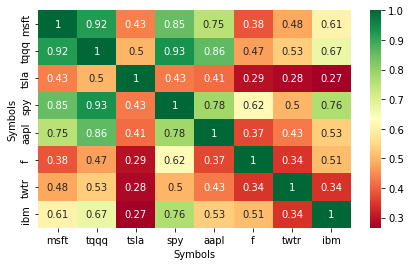

In [3]:
import seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.show()

$\Sigma = [\sigma_{i j}] = [\sigma_i \sigma_j \rho_{i j}]$

$\rho = \left[\begin{array}{cccccccc}
1 & 0.92 & 0.43 & 0.85 & 0.75 & 0.38 & 0.48 & 0.61 \\
0.92 & 1 & 0.5 & 0.93 & 0.86 & 0.47 & 0.53 & 0.67 \\
0.43 & 0.5 & 1 & 0.43 & 0.41 & 0.29 & 0.28 & 0.27 \\
0.85 & 0.93 & 0.43 & 1 & 0.78 & 0.62 & 0.5 & 0.76 \\
0.75 & 0.86 & 0.41 & 0.78 & 1 & 0.37 & 0.43 & 0.53 \\
0.38 & 0.47 & 0.29 & 0.62 & 0.37 & 1 & 0.34 & 0.51 \\
0.48 & 0.53 & 0.28 & 0.5 & 0.43 & 0.34 & 1 & 0.34 \\
0.61 & 0.67 & 0.27 & 0.76 & 0.53 & 0.51 & 0.34 & 1
\end{array}\right]$

We will simulate $10,000$ random portfolios by defining a random $10,000 \times 8$ array (namely rand2d) such that each row sums to $1$.

In [4]:
np.random.seed(0)

rand2d = np.random.random((10000,NoA))
rand2d = rand2d/rand2d.sum(axis=1,keepdims=1)

We can calculate portfolio returns and standard deviations with these formulae:

$\mathrm{E}\left(R_{p}\right)=\sum_{i} w_{i} \mathrm{E}\left(R_{i}\right)$

$\sigma_{p}^{2}=\sum_{j, i} w_{i} w_{j} \sigma_{i} \sigma_{j} \rho_{i j}=\sum_{i} w_{i}^{2} \sigma_{i}^{2}+\sum_{i} \sum_{j \neq i} w_{i} w_{j} \sigma_{i} \sigma_{j} \rho_{i j}$, since $\rho_{i i} = 1$

Additionally we need to multiply by the number of trading days in a year to define yearly paramaters rather than daily.

In [5]:
retSimulated = rand2d.dot(dfret.mean())*252
volSimulated = np.sqrt(np.diag(rand2d@(dfret.cov() * 252@rand2d.T)))

We define the risk free rate to be $0$, and the Sharpe ratio calculation is thus $\frac{R_p}{\sigma_p}$.

In [6]:
sharpeSimulated = retSimulated / volSimulated

Now we can plot the graph - along with the highest sharpe ratio portfolio and lowest variance portfolio denoted with stars.

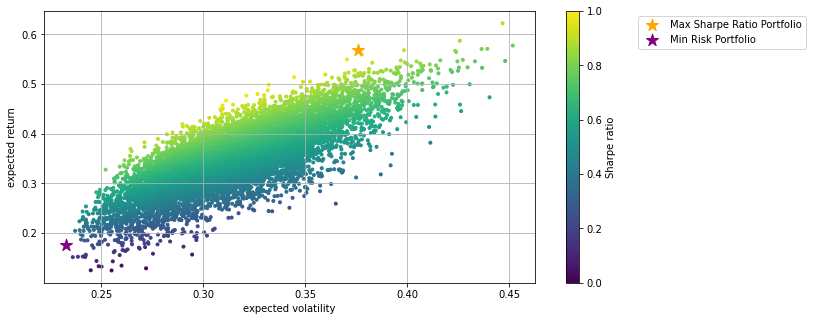

In [7]:
sharpeSimulated = retSimulated / volSimulated

plt.figure(figsize=(11, 5))
plt.scatter(volSimulated, retSimulated, c=sharpeSimulated, marker='.')
plt.grid(True)

max_sr_vol = volSimulated[np.argmax(sharpeSimulated)]
max_sr_ret = retSimulated[np.argmax(sharpeSimulated)]

min_ri_vol = volSimulated[np.argmin(volSimulated)]
min_ri_ret = retSimulated[np.argmin(volSimulated)]


plt.scatter(max_sr_vol, max_sr_ret, c="orange", marker='*',
            s=160, label="Max Sharpe Ratio Portfolio")

plt.scatter(min_ri_vol, min_ri_ret, c="purple",
            s=160, marker='*', label="Min Risk Portfolio")


plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1))

plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

The optimization equation that we will use to model the frontier in the next cell is taken from here: https://github.com/cantaro86/Financial-Models-Numerical-Methods/blob/master/7.1%20Classical%20MVO.ipynb

In [8]:
from scipy.optimize import Bounds, LinearConstraint, minimize

def optimizer(MU, COV, target_mu, OnlyLong=True):
    """ Finds optimal weights for a fixed target portfolio return """
    
    N = len(MU)
    if OnlyLong == True:
        bounds = Bounds(0, 1)
    A = np.vstack( (np.ones(N), MU) )
    B = np.array([1,target_mu])
    linear_constraint = LinearConstraint( A, B, B)
    
    weights = np.ones(N)
    x0 = weights/np.sum(weights) #Create x0, the initial guess for the weights

    #Define the objective function
    quadratic_form = lambda w: (w.T @ COV @ w) 
    if OnlyLong:
        res = minimize(quadratic_form, x0=x0, method='trust-constr', constraints=linear_constraint, bounds=bounds)
    else:
        res = minimize(quadratic_form, x0=x0, method='trust-constr', constraints=linear_constraint)
    return res.x

We again plot our random portfolios but with the adjustments
- Risk free rate is $3$% annually
- Add the security market line
- Add the efficient frontier, computed with optimizer defined above

In [9]:
MU = dfret.mean()*252
COV = dfret.cov()*252
Rf = 0.03

samples = 200
means = np.linspace(0, np.max(MU), samples)       # vector of target expected returns
stds = np.zeros_like(means)
sharpe_ratio = np.zeros_like(means)

for i,mn in enumerate(means):
    w_opt = optimizer(MU, COV, mn)                 # optimal weights
    stds[i] = np.sqrt(w_opt@COV@w_opt)
    sharpe_ratio[i] = (mn - Rf)/stds[i]
    
ind_SR = np.argmax(sharpe_ratio)      # index of the maximum Sharpe Ratio
max_SR = sharpe_ratio[ind_SR]         # maximum Sharpe ratio

y = np.linspace(0, stds.max(), samples)
CML = Rf + max_SR * y       

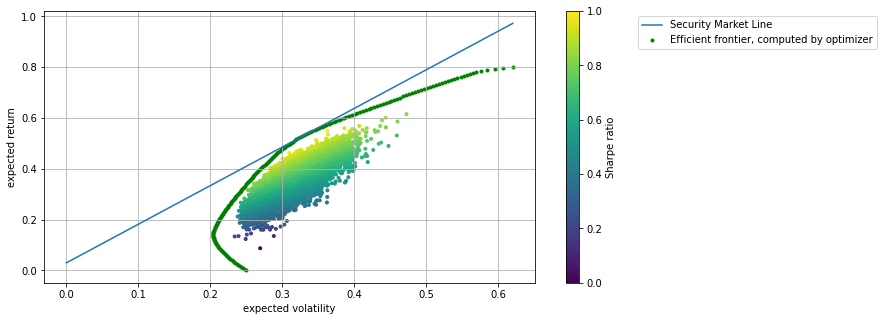

In [10]:
rand2d = np.random.random((10000,NoA))
rand2d = rand2d/rand2d.sum(axis=1,keepdims=1)

retSimulated = rand2d.dot(dfret.mean())*252
volSimulated = np.sqrt(np.diag(rand2d@(dfret.cov() * 252@rand2d.T)))
sharpeSimulated = retSimulated / volSimulated

plt.figure(figsize=(11, 5))
plt.scatter(volSimulated, retSimulated, c=sharpeSimulated, marker='.') # plots random portfolios

plt.scatter(stds, means, c='green', marker='.', label='Efficient frontier, computed by optimizer')
plt.grid(True)

plt.xlabel('expected volatility') # we can incorporate latex with r'$E(\sigma_P)$'
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.plot(y, CML, label='Security Market Line')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
plt.show()

Now we can display the optimal portolio weightings according to modern portfolio theory.

The results are reasonable when we consider how well msft, tsla, and aapl over our timeperiod - as well as how poorly the other stocks did relatively.

This portfolio's expected return and volatility lie on the SML and the efficient frontier.

In [11]:
import pandas as pd

display(pd.DataFrame( [dict(zip( tickers, optimizer(MU, COV, means[ind_SR]).round(4)))]))

,msft,tqqq,tsla,spy,aapl,f,twtr,ibm
0,0.2419,0.0,0.2806,0.0,0.4589,0.0,0.0186,0.0


We incorporate the following equations from http://www.math.utah.edu/~zhu/5765.17s/week10.pdf which solve for the optimal portfolio when short selling is permitted, ie we drop the constraint that $\mathbf{x} \geq \mathbb{0}$

$\begin{aligned}
&A=\mathbf{l}^{T} \Sigma^{-1} \mathbf{l}>0 \\
&B=\boldsymbol{\mu}^{T} \Sigma^{-1} \mathbf{l} \\
&C=\mu^{T} \Sigma^{-1} \boldsymbol{\mu}>0
\end{aligned}$

$\mathbf{x}_{\mu}=\left(\frac{C-\mu B}{A C-B^{2}}\right) \Sigma^{-1} \mathbf{l}+\left(\frac{\mu A-B}{A C-B^{2}}\right) \Sigma^{-1} \boldsymbol{\mu}$, where $A C - B^2 > 0$

$\sigma_{P}^{2}(\mu)= \mathbf{x}_{\mu}^T \Sigma \mathbf{x}_{\mu}$

$\sigma_{P}^{2}(\mu)=\frac{A \mu^{2}-2 B \mu+C}{A C-B^{2}}$

$\sigma_{P} = \sqrt{\frac{A \mu^{2}-2 B \mu+C}{A C-B^{2}}}$


In [12]:
l = np.ones_like(MU)
A = l.T@np.linalg.inv(COV)@l
B = MU.T@np.linalg.inv(COV)@l
C = MU.T@np.linalg.inv(COV)@MU

def vol_P(mu_target):
    return (A*mu_target**2-2*B*mu_target+C)/(A*C-B*B)

print(A, B, C)

189.247082565244 10.4454395135079 4.90707220167619


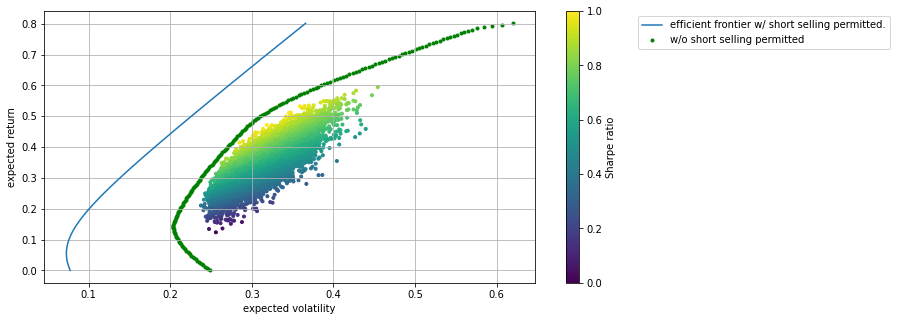

In [13]:
rand2d = np.random.random((10000,NoA))
rand2d = rand2d/rand2d.sum(axis=1,keepdims=1)

retSimulated = rand2d.dot(dfret.mean())*252
volSimulated = np.sqrt(np.diag(rand2d@(dfret.cov() * 252@rand2d.T)))
sharpeSimulated = retSimulated / volSimulated

plt.figure(figsize=(11, 5))
plt.scatter(volSimulated, retSimulated, c=sharpeSimulated, marker='.')

plt.scatter(stds, means, c='green', marker='.', label="w/o short selling permitted")
plt.grid(True)

plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
x = np.linspace(0, means.max(), samples)
plt.plot(vol_P(x)**.5, x, label="efficient frontier w/ short selling permitted.")

plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
plt.show()

### Linear & Quadratic Programming

$$\max \left(\begin{array}{llllll}2 & 1 & 2 & 5 & 7 & 8\end{array}\right) x$$
$$\text{s.t.} $$
$$
\begin{aligned}
&\left(\begin{array}{llllll}
2 & 1 & 2 & 3 & 5 & 4 \\
0 & 1 & 2 & 2 & 1 & 4 \\
3 & 1 & 3 & 2 & 2 & 4
\end{array}\right) x \leq\left(\begin{array}{c}
170 \\
160 \\
95
\end{array}\right) \\
&x \geq \mathbb{0} .
\end{aligned}
$$

In [14]:
import scipy
from scipy.optimize import Bounds, LinearConstraint, minimize
import numpy as np

A = np.array([
    [2, 1, 2, 3, 5, 4],
    [0, 1, 2, 2, 1, 4],
    [3, 1, 3, 2, 2, 4]])

b = np.array([170, 160, 95])

c = [2, 1, 2, 5, 7, 8]

Since scipy.optimize.linprog solves for $\operatorname{min}c^{T}x$ and we are solving for $\operatorname{max}c^{T}x$, we can equivalently solve for $\operatorname{min}{-c}^{T}x \text{  s.t.  } \{\ldots\}$ to get our desired $x$

In [15]:
neg_c = np.zeros_like(c) - c
res = scipy.optimize.linprog(neg_c, A_ub=A, b_ub=b, bounds=(0, None))

x_optimal = res.x
print("Our optimal x is: " + str(x_optimal.round(4)) + ".T")

Our optimal x is: [ 0.      0.      0.     10.5804 21.4732  7.7232].T


We can test a few values to verify optimality:

In [16]:
from itertools import product

items = [0, 1]

ep = 0.001

print(c@x_optimal)

def optimal_scaled(arr, b, c):
    if np.all(A@arr-b < 0 for i in A@arr-b):
        return arr
    else:
        return optimal_scaled(arr*.99999, b, c)

for item in product(items, repeat=6):
    tmp = optimal_scaled((x_optimal+ep*(2*np.array(item)-1)), b, c)
    if c@tmp > c@x_optimal:
        print(A@tmp)



264.99999999142574
[170.001       73.52681618  94.997     ]
[169.997       73.52881618  94.997     ]
[170.007       73.53081618  95.001     ]
[170.005       73.53081618  95.003     ]
[170.001       73.53281618  95.003     ]
[170.003       73.52681618  94.999     ]
[170.011       73.53481618  95.007     ]
[170.003       73.52881618  94.999     ]
[169.999       73.53081618  94.999     ]
[170.001       73.52481618  94.995     ]
[170.009       73.53281618  95.003     ]
[170.007       73.53281618  95.005     ]
[170.003       73.53481618  95.005     ]
[170.005       73.52881618  95.001     ]
[170.013       73.53681618  95.009     ]
[170.005       73.52681618  95.003     ]
[170.001       73.52881618  95.003     ]
[170.003       73.52281618  94.999     ]
[170.011       73.53081618  95.007     ]
[170.009       73.53081618  95.009     ]
[170.005       73.53281618  95.009     ]
[170.007       73.52681618  95.005     ]
[170.015       73.53481618  95.013     ]
[170.007       73.52881618  95.005    

$$\max \quad x^T 
\left(\begin{array}{llllll}
1 & 1 & 3 & 6 & 2 & 4 \\
4 & 4 & 4 & 6 & 5 & 2 \\
1 & 2 & 1 & 5 & 3 & 2 \\
5 & 2 & 6 & 0 & 1 & 1 \\
3 & 4 & 5 & 4 & 4 & 5 \\
1 & 3 & 3 & 5 & 6 & 0
\end{array}\right)x \quad
$$
$$\text{s.t.} $$
$$
\\
\begin{aligned}
&\left(\begin{array}{llllll}
2 & 1 & 2 & 3 & 5 & 4 \\
0 & 1 & 2 & 2 & 1 & 4 \\
3 & 1 & 3 & 2 & 2 & 4
\end{array}\right) x \leq\left(\begin{array}{c}
170 \\
160 \\
95
\end{array}\right) \\
\text{ and } \quad &x = \mathbb{0} .
\end{aligned}
$$

In [17]:
Q = np.array([[1, 1, 3, 0, 2, 4],
       [4, 4, 4, 6, 5, 2],
       [1, 2, 1, 5, 3, 2],
       [5, 2, 6, 0, 1, 1],
       [3, 4, 5, 4, 4, 5],
       [1, 3, 3, 5, 6, 0]])

A = np.array([
    [2, 1, 2, 3, 5, 4],
    [0, 1, 2, 2, 1, 4],
    [3, 1, 3, 2, 2, 4]])

b = np.array([170, 160, 95])

fn = lambda x: (x.T@Q@x) 

res = scipy.optimize.minimize(fn, x0=[0, 0, 0, 0, 0, 0], method='trust-constr',
                        bounds=Bounds(-2,2), constraints=LinearConstraint(A, b, b))

C:\tools\Manim\Lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


In [18]:
print(res.fun)
x = res.x
print(x)
print(x.T@Q@x)

4883.04146362359
[-20.52467588   7.2251241    4.35595478  15.41160092  10.79269218
  22.99892823]
4883.04146362359


### Technical Analysis

https://www.quantconnect.com/docs/algorithm-reference/indicators

https://www.axi.com/int/blog/education/technical-indicators

In [19]:
import pandas_datareader as pdr

tickers = ['msft', 'tqqq']

df = pdr.DataReader(tickers, data_source='yahoo',
                    start='2017-01-01', end='2020-09-28')['Adj Close']

In [20]:
import numpy as np

x = np.arange(941)
y = df["msft"]

arr = np.zeros((2, 941))

arr[0] = x
arr[1] = y

print(arr)

[[  0.           1.           2.         ... 938.         939.
  940.        ]
 [ 57.93053436  57.67133713  57.67133713 ... 200.09403992 204.65350342
  206.24880981]]


In [21]:
# Sum of squared difference S_xy
def S(x, y):
    return np.sum((x-np.mean(x))*(y-np.mean(y)))

beta_1 = S(x,y)/S(x,x)
beta_0 = np.mean(y) - beta_1*np.mean(x)

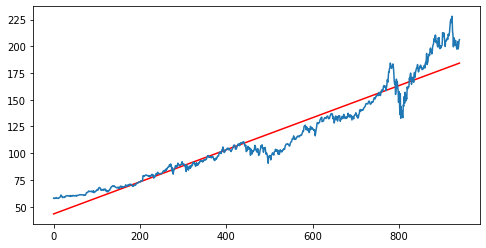

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

x_line = np.linspace(0,940,941)
y_line = beta_1*x+beta_0
plt.plot(x_line, y_line, '-r')
plt.plot(arr[0], arr[1])
#plt.plot(arr[0][0::10], arr[1][0::10])

plt.show()

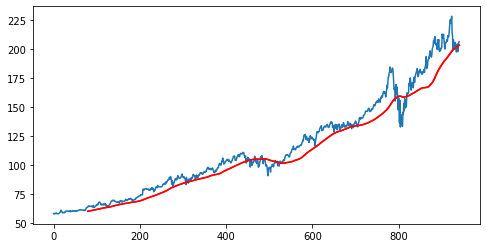

In [23]:
# 1. Moving Average Indicator (MA)

n = 80

ma_method1 = np.convolve(arr[1], np.ones(n)/n, mode='valid')
ma_method2 = y.rolling(window=n).mean()

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(y)), y)
plt.plot(np.arange(len(ma_method1))+n, ma_method1, '-r')
plt.plot(np.arange(len(ma_method2)), ma_method2, '-r')
plt.show()

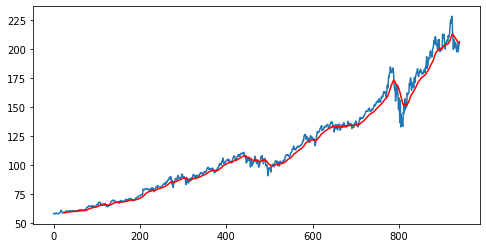

In [24]:
# 2. Exponential Moving Average Indicator (EMA)

n = 26

times = arr[1]
ewma = df['msft'].ewm(span=n, adjust=False, min_periods=n).mean()

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(y)), y)
plt.plot(np.arange(len(ewma)), ewma, '-r')
plt.show()


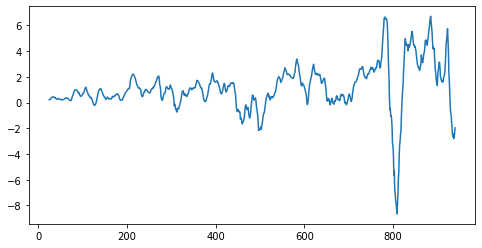

In [25]:
# 3. Moving Average Convergence Divergence (MACD)

ewma_12 = df['msft'].ewm(span=12, adjust=False, min_periods=12).mean()
ewma_26 = df['msft'].ewm(span=26, adjust=False, min_periods=26).mean()

macd = ewma_12 - ewma_26

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(macd)), macd)
plt.show()

$R S I=100-100 /(1+R S)$


$R S I_{\text {step one }}=100-\left[\frac{100}{1+\frac{\text { Average gain }}{\text { Average loss }}}\right]$

In [26]:
df = pdr.DataReader('msft', data_source='yahoo',
                    start='2017-01-01', end='2020-09-28') 

C:\tools\Manim\Lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\tools\Manim\Lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


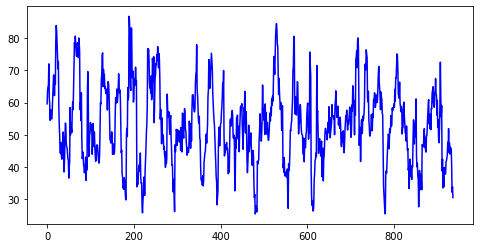

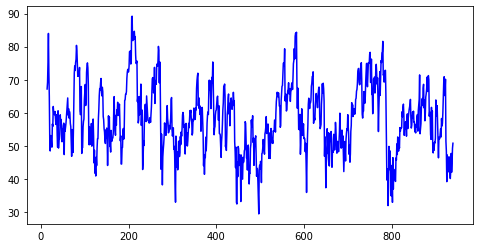

In [27]:
# 4. Relative Strength Index (RSI)

import pandas_ta as ta

n = 14
x = arr[1]

def avg_gain(arr):
    return np.mean(arr[arr >= 0])
    
def avg_loss(arr):
    return np.mean(arr[arr < 0])

RSI = np.zeros(len(x)+100)

for i in range(len(RSI)):
    RSI[i] = 100-100/(1+abs(avg_gain(np.diff(x[i:i+n]) / x[i:i+n][:-1])/
                      avg_loss(np.diff(x[i:i+n]) / x[i:i+n][:-1])))
plt.figure(figsize=(8, 4))
plt.plot(RSI, '-b')
plt.show()

# __________________________ 
rsi = np.array(df[["Close"]].ta.rsi())

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(rsi)), rsi, '-b')

plt.show()

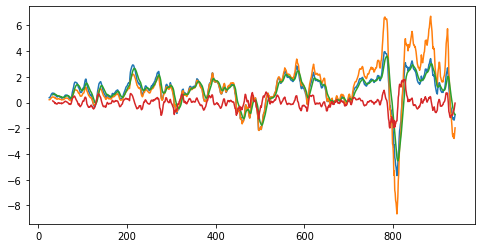

In [28]:
# 5. Percentage Price Oscillator indicator (PPO)

ewma_12 = df['Adj Close'].ewm(span=12, adjust=False, min_periods=12).mean()
ewma_26 = df['Adj Close'].ewm(span=26, adjust=False, min_periods=26).mean()

macd = ewma_12 - ewma_26

PPO = macd/ewma_26*100

PPO_signal = PPO.ewm(span=9, adjust=False, min_periods=9).mean()
PPO_hist = PPO - PPO_signal

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(PPO)), PPO)
plt.plot(np.arange(len(macd)), macd)
plt.plot(np.arange(len(PPO_signal)), PPO_signal)
plt.plot(np.arange(len(PPO_hist)), PPO_hist)
plt.show()

$S A R_{n+1}=S A R_{n}+\alpha\left(E P-S A R_{n}\right)$

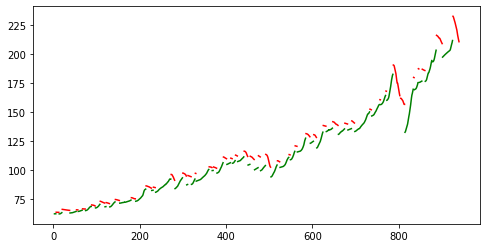

In [29]:
# 6. Parabolic SAR indicator (PSAR)

alpha = 0.1

df = pdr.DataReader('msft', data_source='yahoo',
                    start='2017-01-01', end='2020-09-28') 

psar = ta.psar(high=df['High'], low=df['Low'], close=df['Close'], af0=0.02, af=0.02, max_af=0.2)

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(psar)), psar['PSARl_0.02_0.2'], '-g')
plt.plot(np.arange(len(psar)), psar['PSARs_0.02_0.2'], '-r')
plt.show()


https://github.com/QuantConnect/Lean/blob/master/Indicators/AverageDirectionalIndex.cs

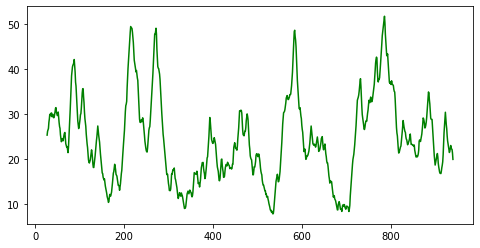

In [30]:
# 7. Average Directional Index (ADX)

adx = df.ta.adx(high=df['High'], low=df['Low'], close=df['Close'])

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(adx)), adx['ADX_14'], '-g')
#plt.plot(np.arange(len(adx)), adx['DMP_14'], '-r')
#plt.plot(np.arange(len(adx)), adx['DMN_14'], '-b')
#plt.axhline(20,color='red')
#plt.axhline(25,color='red')
plt.show()

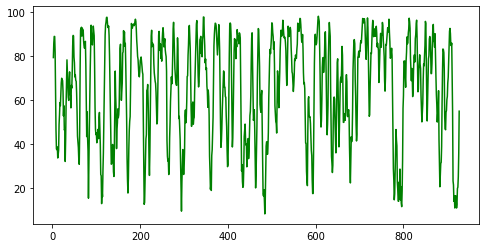

In [31]:
# 8. Stochastic Oscillator Indicator

stoch = df.ta.stoch(high=df['High'], low=df['Low'], close=df['Close'])

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(stoch)), stoch['STOCHk_14_3_3'], '-g')
#plt.plot(np.arange(len(stoch)), stoch['STOCHd_14_3_3'], '-r')

plt.show()

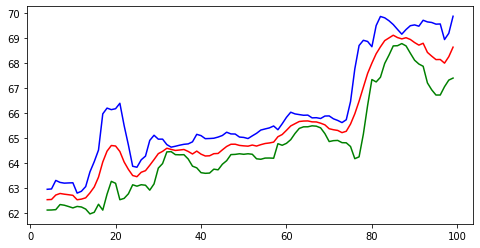

In [32]:
# 9. Bollinger Bands Indicators

#bbands = ta.bbands(high=df['High'], low=df['Low'], close=df['Close'])
bbands = ta.bbands(high=df[0:100]['High'], low=df[0:100]['Low'], close=df[0:100]['Close'])

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(bbands)), bbands['BBL_5_2.0'], '-g')
plt.plot(np.arange(len(bbands)), bbands['BBM_5_2.0'], '-r')
plt.plot(np.arange(len(bbands)), bbands['BBU_5_2.0'], '-b')
#plt.plot(np.arange(len(bbands)), bbands['BBB_5_2.0'], '-')
#plt.plot(np.arange(len(bbands)), bbands['BBP_5_2.0'], '-y')

plt.show()

Calculation
1. Calculate the SMA for Period $n$
2. Subtract the SMA value from step one from the Close for each of the past $n$ Periods and square them
3. Sum the squares of the differences and divide by $n$
4. Calculate the square root of the result from step three
$\mathrm{SD}=$ Sqrt $\left[\left(\right.\right.$ Sum the $\left.\left.\left((\text { Close for each of the past } n \text { Periods }-n \text { Period SMA for current bar })^{\wedge} 2\right)\right) / n\right]$

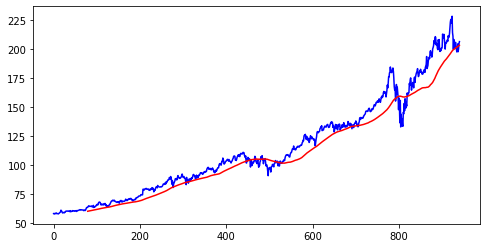

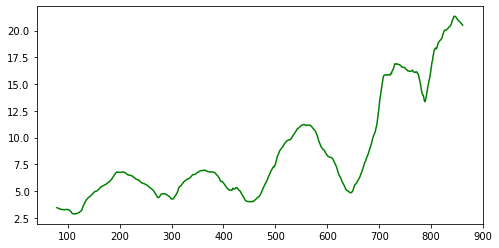

In [33]:
# 10. Standard Deviation Indicator

import scipy
from scipy.spatial.distance import cdist

n = 80

SMA = df['Adj Close'].rolling(window=n).mean()
sdArr = df['Adj Close'].rolling(window=n).std()

diff = np.array(SMA) - np.array(df['Adj Close'])
diff_squared = np.power(diff, 2)

diff_squared_rolling = np.convolve(diff_squared, np.ones(n)/n, mode='valid')
sqrt_dsr = np.power(diff_squared_rolling, 0.5)

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(df['Adj Close'])), df['Adj Close'], '-b')
plt.plot(np.arange(len(df['Adj Close'])), SMA, '-r')

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(sqrt_dsr)), sqrt_dsr, '-g')

plt.show()

# Machine Learning

### Principal component analysis (PCA) 

[[-0.56264911 -0.59495932 -0.57397682]
 [ 0.82561176 -0.43994302 -0.35329218]
 [-0.04232262 -0.67266154  0.73873896]]


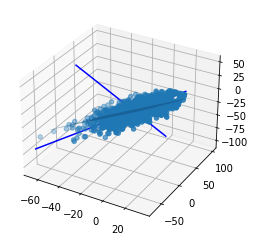

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

import pandas as pd

df = pd.read_csv('NotesDataFolder/StudentsPerformance.csv')
df = df[['math score','writing score', 'reading score']]

df = pd.DataFrame(df).to_numpy()

x1 = np.zeros(len(df))
x2 = np.zeros(len(df))
x3 = np.zeros(len(df))

for i in range(len(df)):
    x1[i] = df[i][0]
    x2[i] = df[i][1]
    x3[i] = df[i][2]

x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)
x3 = x3 - np.mean(x3)

df = pd.DataFrame({'Column1': x1, 'Column2': x2, 'Column3': x3})

sm = np.array([[0, 0, 0],
               [0, 0, 0],
               [0, 0, 0]])
for i in range(len(df)):
    sm = sm + np.outer(np.array([x1[i] , x2[i], x3[i]]), np.array([x1[i] , x2[i], x3[i]]))
sm = sm/len(df)

U = np.linalg.svd(sm)[0]
print(U.T)

x_trend = np.linspace(min(x1), max(x1), 100)
y_trend = U.T[0][1]/U.T[0][0]*x_trend

plt.scatter(x1, x2)
plt.plot(x_trend, y_trend, '-b')

#%matplotlib notebook
%matplotlib inline

import random
fig = plt.figure(figsize=(4, 8))
ax = fig.add_subplot(projection='3d')

#plot the plane
xx, yy = np.meshgrid(range(-60, 25), range(-60, 100))
z = xx*U.T[0][2]/U.T[0][0]+yy*U.T[1][2]/U.T[1][0]
ax.plot_surface(xx, yy, z, alpha=0.5)

phi = np.linspace(min(x1), max(x1), 100)
x_t = U.T[0][0]/U.T[0][0]*phi
y_t = U.T[0][1]/U.T[0][0]*phi
z_t = U.T[0][2]/U.T[0][0]*phi

ax.plot(x_t, y_t, z_t, '-b')

phi = np.linspace(min(x1), max(x1), 100)
x_t = U.T[1][0]/U.T[1][0]*phi
y_t = U.T[1][1]/U.T[1][0]*phi
z_t = U.T[1][2]/U.T[1][0]*phi

ax.plot(x_t, y_t, z_t, '-b')

#plot the line
'''phi = np.linspace(min(x1), max(x1), 100)
x_t = U.T[0][0]/U.T[0][0]*phi
y_t = U.T[0][1]/U.T[0][0]*phi
z_t = U.T[0][2]/U.T[0][0]*phi

ax.plot(x_t, y_t, z_t, '-b')
'''

ax.scatter(x1, x2, x3)
plt.show()

### Monte Carlo Simulation

I wrote the price option function, which computes the Black-Scholes option value using a binomial tree, for an assignment for my [Computational Methods in Business and Finance](https://uwflow.com/course/cs335) class at University of Waterloo. It utilizes dynamic programming methods for the American option pricing, though at time of writing there may be some revisions needed for that function.

In [35]:
import numpy as np

def price_option(S0, K, T, r, sigma, opttype, Nsteps, american):
    delt = T/Nsteps;
    # tree parameters
    u = np.exp(sigma * np.sqrt(delt) );
    d = 1./u;
    a = np.exp( r*delt );
    p = (a - d)/(u - d);
    # payoff at t=T
    W = S0 * d**(np.arange(Nsteps,-1,-1)) * u**(np.arange(Nsteps+1))
    # W is column vector of length Nsteps+1
    if opttype == 0:
        W = np.maximum( W - K, 0);
    else:
        W = np.maximum( K - W, 0);
    # backward recursion
    for i in np.arange(Nsteps,0,-1):
        W = np.exp(-r*delt)*( p*W[1:i+1] + (1-p)*W[0:i] )
        if american == 1:
            if opttype == 0:
                S = np.maximum(-K+S0 * d**(np.arange(i,-1,-1)) * u**(np.arange(i+1)), 0)
            else:
                S = np.maximum( K-S0 * d**(np.arange(i-1,-1,-1)) * u**(np.arange(i)), 0)
            W = np.maximum(W, S)
    return str(W[0])

In [36]:
S0 = 90
K = 100
T = 1
r = 0.06
sigma = .12
opttype = 0; # opttype - 0 for a call, otherwise a put
american = 0; # american - 0 for European, otherwise American
Nsteps = 10000

price_option(S0, K, T, r, sigma, opttype, Nsteps, american)

'2.6282042479158183'

### Classification - Ensemble Method


In this section, we build a model to predict political affiliation based on the main five features from the Moral Foundations Questionnaire; a survey aiming at describing differences in individuals' moral concerns. The data was aggregated by Graham, Haidt, and Nosek and the dataset used in this section can be [found here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12658&studyListingIndex=0_775f45d232bb5e430d0024139e25).

After processing the data in the first cell, we have a matrix $X$ with rows pertaining to the moral preferences of each respondent and an array $y$ indicating whether they identify as a liberal (1) or a moderate or conservative (0 for both).

We will use the following classifiers to fit our training set:

    1) Decision Tree

    2) Logistic Regression

    3) K Nearest Neighbors

    4) Naive Bayes (Gaussian)

    5) Neural Network

At the end, we fit an ensemble classifier combining the above five models and comment on its performance against that of the other classifiers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.read_csv('NotesDataFolder/GrahamHaidtNosek.2009.JPSP.Study_3.tab',sep="\t", low_memory=False)

df = df_original[['pol_liberal', 'pol_moderate', 'pol_conservative', 'HARM_AVG',
         'FAIRNESS_AVG', 'INGROUP_AVG', 'AUTHORITY_AVG', 'PURITY_AVG']]

for i in range(len(list(df.columns))):
    df = df[pd.notnull(df[df.columns[i]])]

def process_Xy(df):
    X = df.to_numpy()
    X = X[ ~np.isnan(X).any(axis=1),:]

    y = X[:,:1].flatten()
    X = X[:, 3:]
   
    return X, y

df.head(5)

,pol_liberal,pol_moderate,pol_conservative,HARM_AVG,FAIRNESS_AVG,INGROUP_AVG,AUTHORITY_AVG,PURITY_AVG
21,1.0,0.0,0.0,3.875,4.000,2.000,2.375,1.875
22,0.0,0.0,1.0,3.750,4.000,2.375,3.000,3.125
23,1.0,0.0,0.0,2.750,3.375,0.875,1.500,0.250
24,1.0,0.0,0.0,4.375,2.625,3.500,3.250,2.250
25,0.0,1.0,0.0,4.000,3.625,3.750,2.750,2.000


In [2]:
from sklearn.pipeline import Pipeline

X, y = process_Xy(df)

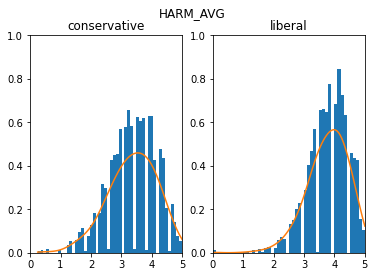

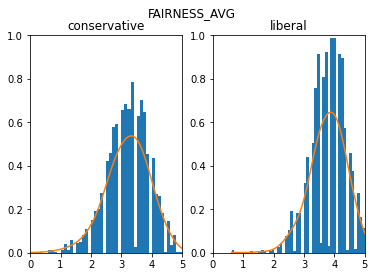

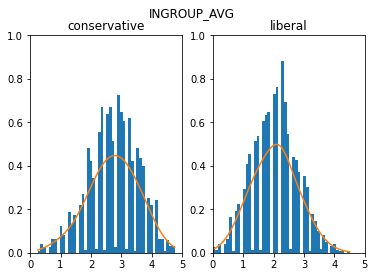

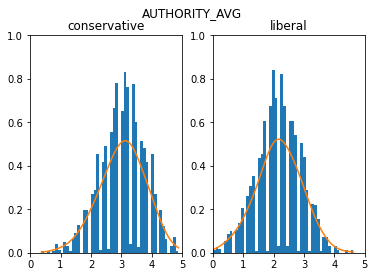

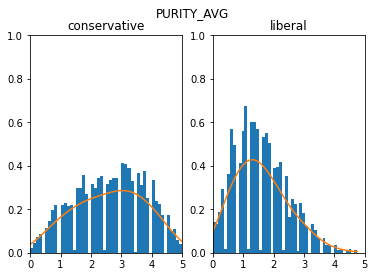

In [3]:
from scipy import stats
plot_dict = {0: 'HARM_AVG', 1: 'FAIRNESS_AVG', 2: 'INGROUP_AVG', 3: 'AUTHORITY_AVG', 4: 'PURITY_AVG'}

def plot_side_by_side(X, max_n=200):
    X_0 = X[y == 0][:max_n] #Cons
    X_1 = X[y == 1][:max_n] #Lib
    for i in range(5): #len(X.T)):
        fig, axs = plt.subplots(1, 2)
        fig.suptitle(plot_dict[i])
        axs[0].set_xlim(0, 5)
        axs[0].set_ylim(0, 1)
        axs[1].set_xlim(0, 5)
        axs[1].set_ylim(0, 1)
        tmp = axs[0].set_title("conservative")
        kernel_0 = stats.gaussian_kde(X_0.T[i], bw_method=0.4)
        linspc = np.linspace(min(X_0.T[i]),max(X_0.T[i]), num=100)
        tmp = axs[0].hist(X_0.T[i], bins=50, density=True)
        tmp = axs[0].plot(linspc,kernel_0(linspc))
        tmp = axs[1].set_title("liberal")
        kernel_1 = stats.gaussian_kde(X_1.T[i], bw_method=0.4)
        linspc = np.linspace(min(X_1.T[i]),max(X_1.T[i]), num=100)
        tmp = axs[1].hist(X_1.T[i], bins=50, density=True)
        tmp = axs[1].plot(linspc,kernel_1(linspc))
        tmp = plt.show()
    return


plot_side_by_side(X, max_n = min(len(X[y == 0]), len(X[y == 1])))

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)    


# Logistic Regression
log_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# K nearest neighbors
knn_clf = KNeighborsClassifier().fit(X_train, y_train)

# Decision Tree
parameters = {'max_leaf_nodes':range(3, 15, 2),
              'min_samples_split': (3, 10),
              'max_depth':range(2, 7)}

dt_clf = DecisionTreeClassifier()
clf_grid = GridSearchCV(dt_clf, parameters, cv=5)
clf_grid.fit(X_train, y_train)

dt_clf.set_params(**clf_grid.best_params_).fit(X_train, y_train)

# Naive Bayes (Gaussian)
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)

# Neural Network
param_grid_NN = {#learning_rate: ['constant', 'adaptive', 'invscaling'],
    'activation': ['identity'],
    'solver': ['adam'], 
    'hidden_layer_sizes': [3, 5] 
}

NN_grid = GridSearchCV(estimator=MLPClassifier(max_iter=500),
             param_grid=param_grid_NN)

NN_clf = MLPClassifier(max_iter=500)

NN_grid.fit(X_train, y_train)
NN_clf.set_params(**NN_grid.best_params_).fit(X_train, y_train)
    
NN_clf.fit(X_train, y_train)


pol_dict = {0: "cons/mod", 1: "lib"}
unique_label = np.unique([y_test, log_clf.predict(X_test)])

estimators = [("Decision Tree", dt_clf), ("Logistic Regression", log_clf),
              ("K Nearest Neighbors", knn_clf), ("Naive Bayes (Gaussian)", NB_clf),
              ("Neural Network", NN_clf)]

for (model_name, model) in estimators:
    conf_mat = pd.DataFrame(
        confusion_matrix(y_test, model.predict(X_test), labels=unique_label), 
        index=['true: {:}'.format(pol_dict[x]) for x in unique_label], 
        columns=['pred: {:}'.format(pol_dict[x]) for x in unique_label]
    )

    print("\n_____________________________________________________\n",
          model_name, '\t Score and Confusion Matrix:')
    print(model.score(X_test, y_test))
    display(conf_mat)


_____________________________________________________
 Decision Tree 	 Score and Confusion Matrix:
0.8077178975382568


,pred: cons/mod,pred: lib
true: cons/mod,251,192
true: lib,97,963



_____________________________________________________
 Logistic Regression 	 Score and Confusion Matrix:
0.823020625415835


,pred: cons/mod,pred: lib
true: cons/mod,262,181
true: lib,85,975



_____________________________________________________
 K Nearest Neighbors 	 Score and Confusion Matrix:
0.8057218895542249


,pred: cons/mod,pred: lib
true: cons/mod,244,199
true: lib,93,967



_____________________________________________________
 Naive Bayes (Gaussian) 	 Score and Confusion Matrix:
0.8043912175648703


,pred: cons/mod,pred: lib
true: cons/mod,295,148
true: lib,146,914



_____________________________________________________
 Neural Network 	 Score and Confusion Matrix:
0.8216899534264803


,pred: cons/mod,pred: lib
true: cons/mod,263,180
true: lib,88,972


In [5]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=estimators,
       flatten_transform=True)
eclf = eclf.fit(X_train, y_train)
print(eclf.score(X_test, y_test))

0.8243512974051896


We note that our ensemble classifier has the best performance by a small fraction, and it scored $82.4%$ on our test set. While the small increase in performance may arguably be unjustified by the increase in model complexity compared to say our logistic regression classifier (whose score is $82.3%$), ensemble methods tend to be more robust to new data and hence this model is likely an effictive model for classifying our dataset.

### Bagging & Random Forrest methods

#### Bootstrap Aggregating

Our bagging algorithm comes from this [YouTube tutorial](https://youtu.be/841I7-imlVo?t=547) by Professor Leslie Myint.

**Estimating test error**

We could always use cross-validation.
- Split data into $K$ folds.
- For each iteration
    - Bootstrap the $K-1$ folds to generate $B$ bootstrap resamples
    - For each bootstrap resample
        - Build a large tree
    - Generated "bagged" predictions for each case in the test fold
    - Compute an accuracy measure from these predictions
- Average the $K$ accuracy measures

Again we look to our dataset on politics and moral foundations, aggregated by Haidt et al.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.read_csv('NotesDataFolder/GrahamHaidtNosek.2009.JPSP.Study_3.tab',sep="\t", low_memory=False)

df = df_original[['pol_liberal', 'pol_moderate', 'pol_conservative', 'HARM_AVG',
         'FAIRNESS_AVG', 'INGROUP_AVG', 'AUTHORITY_AVG', 'PURITY_AVG']]

for i in range(len(list(df.columns))):
    df = df[pd.notnull(df[df.columns[i]])]

def process_Xy(df):
    X = df.to_numpy()
    X = X[ ~np.isnan(X).any(axis=1),:]

    y = X[:,:1].flatten()
    X = X[:, 3:]
   
    return X, y

X, y = process_Xy(df)

In [2]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from scipy import stats

# Number of bootstrap resamples (todo: pass as variable in bag_predict())
B = 25

# Sample with replacement from pop
def swr(pop, bstrap_samples_size):
    return np.random.choice(np.arange(len(pop)), size=bstrap_samples_size, replace=True)

# Bagging on an individual fold
def bagging_algorithm(dt_clf, X_train, y_train, bstrap_samples_size=1000):
    models = []
    for i in range(B):
        indices = swr(X_train, bstrap_samples_size)
        bstraps_X = X_train[indices]
        bstraps_y = y_train[indices]
        dt_clf.fit(bstraps_X, bstraps_y)
        models.append(dt_clf)
    return models

# Machine Learning ensemble method to predict y_test, based on the bootstrap
# aggregating (bagging) classifier
def bag_predict(dt_clf, X_train, y_train, X_test, bstrap_samples_size=1000):
    all_bootstrap_predictions = np.full((B, len(X_test)), np.inf)
    for i in range(B):
        all_bootstrap_predictions[i] = bagging_algorithm(dt_clf, X_train, y_train, bstrap_samples_size=
                                                         bstrap_samples_size)[i].predict(X_test)

    bagged_prediction = np.full(len(X_test), np.inf)
    for i in range(len(X_test)):
        bagged_prediction[i] = stats.mode(all_bootstrap_predictions.T[i])[0][0]
    return bagged_prediction

# Test our bagging classifier with k-fold Cross-Validation
def cross_validate_bagging(X, dt_clf, cv=5):
    kf = KFold(n_splits=cv, shuffle=True)
    kf.get_n_splits(X)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        bagged_prediction = bag_predict(dt_clf, X_train, y_train, X_test)
        print(" score:\t", 1 - np.mean(np.abs(bagged_prediction - y_test)))
    return
        
# Running our bag_prdict and cross_validate_bagging function
dt_clf = DecisionTreeClassifier(splitter="random")

X, y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("our prediction of y_test is: ", bag_predict(dt_clf, X_train, y_train, X_test, bstrap_samples_size=1200), "\n")

print("our cross validation scores are:")
cross_validate_bagging(X, dt_clf)

our prediction of y_test is:  [1. 1. 1. ... 1. 0. 1.] 

our cross validation scores are:
 score:	 0.8236272878535773
 score:	 0.8186356073211314
 score:	 0.8211314475873543
 score:	 0.821963394342762
 score:	 0.8394342762063228


#### Random Forests

The condensed information on random forests in this cell were taken from Professor Gautam Kamath's notes on bagging and boosting, found [here](http://www.gautamkamath.com/courses/CS480-sp2022-files/lec8.pdf)

- Bagging on decision trees
    - Twist to add randomness/make bootstrap samples "look" more independent
- Standard decision trees: When choosing which feature to split on, look at all $d$ features and pick the "best" one
    - Downside: if one feature is very informative, will be used in all $B$ datasets
- Random forests: When choosing which feature to split on, look at a random subsample of $m \ll d$ features and pick the "best" one
    - Say, $m=\sqrt{d}$
    - Resample for each split

In [ ]:
# [todo]

### NLP - Carbuying Forum

In [69]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

# posts2.txt is 100mb, and is not hosted on GitHub
# posts3.txt however is 500 kB, but will not perform well
filename=open("NotesDataFolder/posts2.txt","r")


tokens = []
for line in filename.readlines():
    tokens +=  [x.lower() for x in nltk.word_tokenize(line.replace("'",""))]

In [71]:
#[x.lower() for x in tokens]
import re
filtered_tokens = [token for token in tokens if re.search('[a-zA-Z|0-9|\.]', token)]
filtered_tokens2 = [t for t in filtered_tokens if len(t) > 1 or t == '.']

In [72]:
from nltk.corpus import stopwords

filtered_tokens3 = []

stop_words = set(stopwords.words("english"))

for word in filtered_tokens2:
    if word.casefold() not in stop_words:
         filtered_tokens3.append(word)
print(filtered_tokens3[1:10])

['hey', 'considering', '2013', 'kia', 'optima', 'hybrid', 'ex', 'trim', '.']


In [73]:
filtered_tokens4 = filtered_tokens3

for i in range(len(filtered_tokens3)):
    filtered_tokens4[i] = filtered_tokens3[i].rstrip('s')


In [76]:
print(filtered_tokens4[:100])

['2022-06-23', 'hey', 'considering', '2013', 'kia', 'optima', 'hybrid', 'ex', 'trim', '.', '124k', 'mile', 'already', '.', 'experience', 'hybrid', 'vehicle', '.', 'sure', 'hybrid', 'battery', 'cause', 'issue', 'near', 'future', 'car', 'gon', 'na', 'last', 'least', 'year', 'without', 'issue', '.', 'love', 'look', 'feel', 'anything', 'keep', 'mind', 'first', 'time', 'car', 'buyer', 'id', 'appreciate', 'help', '2022-06-23', 'currently', '2009', 'matrix', 'xr', '146,000km', 'rust', 'damage', '.', 'bought', 'month', 'ago', '.', 'changed', 'oil', 'put', 'synthetic', '.', 'changed', 'transmission', 'fluid', 'toyota', 'around', 'brake', 'done', 'tire', 'changed', 'spark', 'plug', 'got', 'replace', 'week', '.', 'current', 'problem', 'fuel', 'gauge', 'drove', 'tank', 'empty', 'filled', 'full', 'apparently', 'still', '1/4', 'tank', 'left', 'empty', 'gauge', 'said', 'empty', '.', 'ga']


In [74]:
from more_itertools import split_after

flt5 = list(split_after(filtered_tokens4[1:], lambda x: x == "."))

In [75]:
from gensim.models import Phrases

bigram = Phrases(flt5, min_count=1, threshold=3)

fng = []
for i in range(len(flt5)):
    fng.append(bigram[flt5[i]])

In [77]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=fng, vector_size=200, window=5, min_count=1, workers=4)

In [78]:
print(list(model.wv.key_to_index.keys())[:80])

['.', 'car', 'im', 'would', 'looking', 'get', 'like', 'also', 'one', 'want', 'need', 'new', 'drive', 'good', 'year', 'used', 'vehicle', 'im_looking', 'look', 'something', 'know', 'really', 'buy', 'reliable', 'ive', 'much', 'price', 'mile', 'option', 'think', 'work', 'driving', 'go', 'time', 'thing', 'dont', 'lot', 'well', 'around', 'better', 'model', 'since', 'seem', 'reliability', 'going', 'suv', 'two', 'right', 'budget', 'getting', 'still', 'love', 'mileage', 'that', 'awd', 'currently', 'thought', 'guy', 'fun', 'make', 'http', 'anything', 'manual', 'old', '...', 'price_range', 'amp_x200b', 'would_like', 'le', 'suggestion', 'could', 'even', 'nice', 'truck', 'maybe', 'thank', 'sedan', 'issue', 'little', 'buying']


In [79]:
print(model.wv.most_similar("living_toronto", topn=8))
print("\n")
print(model.wv.most_similar("im_considering", topn=8))

[('located_canada', 0.916853129863739), ('vancouver_bc', 0.9053212404251099), ('male_living', 0.9025725722312927), ('new_brunswick', 0.9001185894012451), ('location_vancouver', 0.8990403413772583), ('toronto_area', 0.8983715772628784), ('im_23f', 0.8981373310089111), ('henderson', 0.8971377015113831)]


[('im_interested', 0.8474637269973755), ('im_thinking', 0.819386899471283), ('im_torn', 0.8149383068084717), ('im_debating', 0.8039095997810364), ('ive_considered', 0.7620350122451782), ('im_stuck', 0.7164387702941895), ('originally_thinking', 0.714503824710846), ('debating', 0.7144978642463684)]


### Regression

$r=\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}$

$r=\frac{\operatorname{cov}(X, Y)}{\sigma_{X} \sigma_{Y}}$

$y_{i}=\beta_{0}+\beta_{1} x_{i}+\epsilon_{i} \quad i=1, \ldots, n$

find $\hat{\beta}_{0}, \hat{\beta}_{1}$ that minimizes the sum of squares of the errors $\sum_{i=1}^{n} \epsilon_{i}^{2}$. Ie minimize

$S\left(\beta_{0}, \beta_{1}\right)=\sum_{i=1}^{n} \epsilon_{i}^{2}=\sum_{i=1}^{n}\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i}\right)\right]^{2}$

$\frac{\partial S}{\partial \beta_{0}}=-2 \sum_{i=1}^{n} \left(y_{i}-\left(\beta_{0}+\beta_{1} x_{i}\right)\right)=0$

$\frac{\partial S}{\partial \beta_{1}}=-2 \sum_{i=1}^{n} x_{i}\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i}\right)\right]=0$

Rearranging first we get

$\sum_{n=1}^{n} y_{i}=n \hat{\beta}_{0}+\sum_{n=1}^{n} x_{i} \hat{\beta}_{1}$

$\hat{\beta}_{0}=\bar{y}-\hat{\beta}_{1} \bar{x}$

And second we get 

$\sum_{n=1}^{n} x_{i} y_{i}=\sum_{i=1}^{n} x_{i} \hat{\beta}_{0}+\sum_{n=1}^{n} x_{i}^{2} \hat{\beta}_{1}$

$\hat{\beta}_{1} = \frac{\sum_{n=1}^{n} x_{i} y_{i}-\sum_{i=1}^{n} x_{i} \hat{\beta}_{0}}{\sum_{n=1}^{n} x_{i}^{2}}$

$\frac{\partial S}{\partial \beta_{1}}=-2 \sum_{i=1}^{n} x_{i}\left[y_{i}-\left(\bar{y}-\hat{\beta}_{1} \bar{x}+\beta_{1} x_{i}\right)\right]=0$

$\sum_{i=1}^{n} x_{i} y_{i} = \sum x_i \bar{y}+\hat{\beta}_{1} \sum_{i=1}^{n}x_i(x_{i} - \bar{x})$

$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} x_{i} y_{i}-\sum x_{i} \bar{y}}{\sum_{i=1}^{n} x_{i}\left(x_{i}-\bar{x}\right)}$

$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x}) y_{i}-\sum (x_{i} - \bar{x}) \bar{y}}{\sum_{i=1}^{n} (x_{i} - \bar{x})\left(x_{i}-\bar{x}\right)}=\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum\left(x_{i}-\bar{x}\right)^{2}} = \frac{S_{x y}}{S_{x x}}$

Thus we get

$\hat{\beta}_{0}=\bar{y}-\hat{\beta}_{1} \bar{x}$

$\hat{\beta}_{1}=\frac{S_{x y}}{S_{x x}}$

In [80]:
import pandas_datareader as pdr

tickers = ['msft', 'tqqq']

df = pdr.DataReader(tickers, data_source='yahoo',
                    start='2017-01-01', end='2020-09-28')['Adj Close']

In [83]:
import numpy as np

x = np.arange(941)
y = df["msft"]

arr = np.full((2, 941), 0)

arr[0] = x
arr[1] = y

In [84]:
# Sum of squared difference S_xy
def S(x, y):
    return np.sum((x-np.mean(x))*(y-np.mean(y)))

beta_1 = S(x,y)/S(x,x)
beta_0 = np.mean(y) - beta_1*np.mean(x)



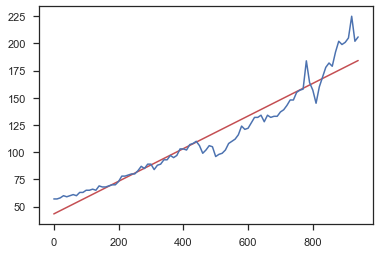

In [85]:
import matplotlib.pyplot as plt

x = np.linspace(0,940,941)
y = beta_1*x+beta_0
plt.plot(x, y, '-r')
plt.plot(arr[0][0::10], arr[1][0::10])

plt.show()

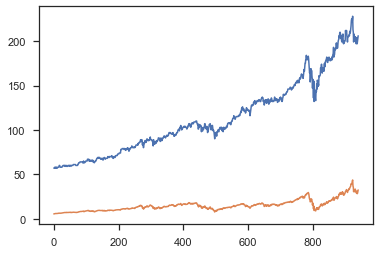

In [86]:
arr4 = np.concatenate((arr, [np.array(df["tqqq"])]), axis=0)

plt.plot(arr4[0],arr4[1])
plt.plot(arr4[0],arr4[2])
plt.show()

n observations and p explanitory covariates:

$S\left(\beta_{0}, \beta_{1}, \ldots, \beta_{p}\right)=\sum\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}\right)\right]^{2}$

Setting partials to $0$:

$\begin{aligned}
&\frac{\partial S}{\partial \beta_{0}}=-2 \sum x_{i 0}\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}\right)\right]=0 \\
&\frac{\partial S}{\partial \beta_{1}}=-2 \sum x_{i 1}\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}\right)\right]=0 \\
&\vdots \\
&\frac{\partial S}{\partial \beta_{p}}=-2 \sum x_{i p}\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}\right)\right]=0
\end{aligned}$

$\begin{aligned}
&\left(\sum_{i=1}^n x_{i 0}^2\right)\beta_{0}+\left(\sum_{i=1}^n x_{i 0} x_{i 1}\right) \beta_{1}+\ldots+\left(\sum_{i=1}^n x_{i 0} x_{i p}\right) \beta_{p}=\sum_{i=1}^n x_{i 0} y_{i} \\
&\left(\sum_{i=1}^n x_{i 0} x_{i 1}\right) \beta_{0}+\left(\sum_{i=1}^n x_{i 1}^{2}\right) \beta_{1}+\ldots+\left(\sum_{i=1}^n x_{i 1} x_{i p}\right) \beta_{p}=\sum_{i=1}^n x_{i 1} y_{i} \\
&\vdots \\
&\left(\sum_{i=1}^n x_{i 0} x_{i p}\right) \beta_{0}+\left(\sum_{i=1}^n x_{i 1} x_{i p}\right) \beta_{1}+\ldots+\left(\sum_{i=1}^n x_{i p}^{2}\right) \beta_{p}=\sum_{i=1}^n x_{i p} y_{i}
\end{aligned}$

$X^T X \hat{\beta} = X^Ty$

$\hat{\beta} = \left(X^{T} X\right)^{-1} X^{T} y$, assuming $X$ is non-singular

$y$ is $n$ x $1$

$X$ is $n$ x $(p+1)$,  

$\beta$ is $(p+1)$ x $1$

$X^T X$ is $p+1$ by $p+1$

### Neural Net (extremely rudimentary)

In [87]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 1ms/step - loss: 0.5012 - accuracy: 0.8593
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2447 - accuracy: 0.9295
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2101 - accuracy: 0.9383


In [88]:
val_loss = model.evaluate(x_test, y_test)[0]
val_acc = model.evaluate(x_test, y_test)[1]
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2076 - accuracy: 0.9396
0.20760862529277802 0.9395999908447266


In [89]:
predictions = model.predict([x_train])

1875/1875 [==============================] - 2s 1ms/step


1


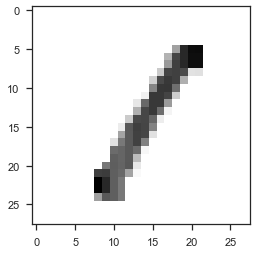

In [90]:
import matplotlib.pyplot as plt

import numpy as np

print(np.argmax(predictions[3]))

plt.imshow(x_train[3], cmap=plt.cm.binary)
plt.show()

In [91]:
#w = model.get_layer('flatten').get_weights()
#np.array(w[0]).shape
#print(w[0][0])

#m = np.array_split(w[0].T[11], 28)

#plt.imshow(m, cmap=plt.cm.binary)
#plt.show()

In [92]:
"""d4 = model.get_layer('dense_3').get_weights()

print(d4[0][0])

for i in range(16):
    md4 = np.array_split(d4[0].T[i], 28)
    plt.imshow(md4)
    plt.show()"""

"d4 = model.get_layer('dense_3').get_weights()\n\nprint(d4[0][0])\n\nfor i in range(16):\n    md4 = np.array_split(d4[0].T[i], 28)\n    plt.imshow(md4)\n    plt.show()"

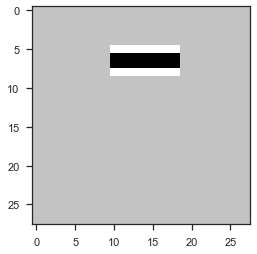

In [93]:
topEdge = np.zeros(784, dtype=float)

for i in range(len(topEdge)):
    if i % 28 in range(10, 19) and i // 28 in range(6, 8):
        topEdge[i] = 1
    if i % 28 in range(10, 19) and i // 28 in [5, 8]:
        topEdge[i] = -.3


plt.imshow(np.array_split(topEdge, 28), cmap=plt.cm.binary)
plt.show()

In [94]:
leftEdge = np.zeros(784, dtype=float)

for i in range(len(leftEdge)):
    if i // 28 in range(10, 19) and i % 28 in range(6, 8):
        leftEdge[i] = 1
    if i // 28 in range(10, 19) and i % 28 in [5, 8]:
        leftEdge[i] = -.3

In [95]:
rightEdge = np.zeros(784, dtype=float)

for i in range(len(rightEdge)):
    if i // 28 in range(10, 19) and i % 28 in range(17, 19):
        rightEdge[i] = 1
    if i // 28 in range(10, 19) and i % 28 in [16, 19]:
        rightEdge[i] = -.3

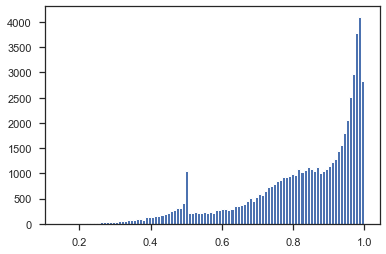

In [96]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

sigmoid(x_train[0].flatten()@topEdge.flatten())

tempArr = []
for i in range(len(x_train)):
    tempArr.append(sigmoid(x_train[i].flatten()@topEdge.flatten()))

tempArr = np.array(tempArr)
    
plt.hist(tempArr, bins=100)
plt.show()


In [97]:
np.array([0, 0, 0, 0, 1, 0, 0, 0])

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

#softmax()

0.13331666666666667


(array([18.,  0., 19.,  0.,  0.,  0.,  0.,  6.,  0.,  7.]),
 array([4. , 4.4, 4.8, 5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <BarContainer object of 10 artists>)

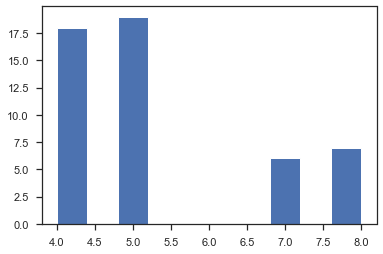

In [98]:
def pdt(k):
    l1 = x_train[k].flatten()
    
    l2 = np.array([[sigmoid(l1 @ topEdge)],
             [sigmoid(l1 @ leftEdge)],
                  [sigmoid(l1 @ rightEdge)]])
    
    l3 = np.array([[0, 0, 0], #0
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0], #3
          [0, 1.22, 0],
          [1.05, 0, 0],
          [0, 0, 0], #6
          [.5, 0, .5],
          [.4,.3, .4], #8
          [0,0,0]])

    return np.argmax(l2.T @ l3.T)

m = 0
for i in range(len(x_train)):
    if y_train[i] == pdt(i):
        m += 1
        
print(m / len(x_train))




tmpArr = []
for i in range(1000, 1050):
    #print(pdt(i))
    #plt.imshow(x_train[i], cmap=plt.cm.binary)
    #plt.show()
    tmpArr.append(pdt(i))

plt.hist(tmpArr)

### Computer Vision for Sports Ad Analytics
       
The purpose of this section is to analyze the visibility of certain logos during a sports broadcast. This information could be useful to companies that are thinking about renting advertising space in a sporting arena, or companies trying to estimate their ROI with quantitative methods.

#### Mathematical Model

Suppose we have access to a timeseries array of the viewership throughout the game, say $n$, representing the number of viewers at time $t$. Then we can define an indicator variable $I$ characterizing whether the logo is visible at time $t$, and we can estimate the *overall logo viewership* as

$$\operatorname{OLV} = \sum_{t = 1}^{T} I_t n_t \Delta t \text{ , which gets more accurate as } \Delta t \to \frac{1}{\text{fps}}$$

If we define a variable $V$ representing *how* visible our logo is (in contrast to $I$ being a binary variable), this can give us a more refined understanding of our advertisement's performance. $V$ is dependent on four underlying factors, namely the location on screen, the proportion of the screen that shows our logo, how rotated \& distorted our logo is, and lastly the relative sharpness of our logo (which usually will be a factor of one unless our logo is especially blurry). Thus

$$
\begin{aligned}
\mathrm{OLV} &=\sum_{t=1}^{T} V_{t} n_{t} \Delta t \\
&=\sum_{t=1}^{T} \hat f\left(l_{t}, p_{t}, r_{t}, s_{t}\right) n_{t} \Delta t \phantom{This text will be invisible, this }  \\
&=\sum_{t=1}^{T} s_{t} f\left(l_{t}, p_{t}, r_{t}\right) n_{t} \Delta t \text{ , since $s_t$ just scales $V_t$} 
\end{aligned}
$$

For a given frame $t$,

$\quad l_t$ measures desirability of location

$\quad p_t$ measures proportion of screen

$\quad r_t$ measures how rotated and distorted

$\quad s_t$ measures how sharp the image is

and $f$ maps $(l_t, p_t, r_t)$ to the reals, assessing the visibility of the logo in our frame. $f$ could feasibly be a linear function, whose parameters are fit with linear regression (assuming we label the visibility of logos in frames beforehand).

#### Importing, viewing, & processing video

Our first goal is to be able to see and manipulate a video relevant to our task. Namely we will import a seven minute clip of a broadcasted hockey game, which features rinkside advertisments from companies such as Chipotle and NCSA.

The YouTube link is [here](https://www.youtube.com/watch?v=C3qALOQ0FMc&t=1s) and we can download the game to our local "hockey.mp4" file using [this link](https://www.y2mate.com/youtube/C3qALOQ0FMc)

In [2]:
import cv2

cap = cv2.VideoCapture('C:\\Users\\Jamie\\Downloads\\hockey.mp4')

def show_image_original(img, title="Title", delay=0):
    while True:
        cv2.imshow(title, img)
        if cv2.waitKey(delay) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()
    return

def show_image(img, title="Title"):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.title(title)
    plt.show()


def show_nth_frame(cap, frame_number, title="title"):
    #sample_the_frame_size(cap, 5)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
    res, frame = cap.read()

    #gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #ocr_image(frame)
    
    show_image(frame, title)

In [3]:
def sample_the_frame_size(cap, num_samples):
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    index_of_samples = np.random.randint(num_frames, size=num_samples)
    
    print(num_frames, fps)

In [4]:
import cv2
import math
import os

def discretize_video(vidcap, timestep_in_frames, count_max=math.inf, burst_parameter=1):
    success,image = vidcap.read()
    
    path = "C:\\Users\\Jamie\\Desktop\\Jim\\Folders\CF\\python-miscellaneous\\CS335_Jupyter\\photoSaved\\"
    
    count = 0
    while success and (count // timestep_in_frames < count_max):
        if count % timestep_in_frames in range(0, burst_parameter):
            cap.set(cv2.CAP_PROP_POS_FRAMES, count-1)
            ## if we want multiple frames adjacent to each other,
            ##  then we set burst_parameter > 1
            if burst_parameter > 1:
                cv2.imwrite(path + "frame%s(%d).jpg" % ((str(int(count/timestep_in_frames))).zfill(4),
                                                        count % timestep_in_frames), image)
            else:
                cv2.imwrite(path + "frame%s.jpg" % (str(int(count/timestep_in_frames))).zfill(4), image)  
            #print('Read a new frame: ', success)
            jpg_size = os.path.getsize(path + "frame%s.jpg" % (str(int(count/timestep_in_frames))).zfill(4))
            #print(jpg_size)
            #print(count)
        success,image = vidcap.read()
        count += 1

In [5]:
import matplotlib.pyplot as plt

TSiF = 50
vidcap = cv2.VideoCapture('C:\\Users\\Jamie\\Downloads\\hockey.mp4')

discretize_video(vidcap, TSiF, count_max = 4)

img1 = cv2.imread("photoSaved/frame0000.jpg")
img2 = cv2.imread("photoSaved/frame0001.jpg")

#show_image(img1)
#show_image(img2)

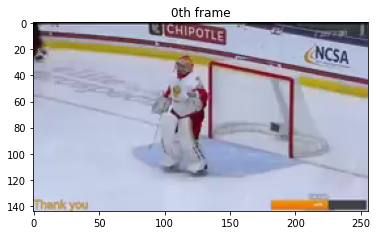

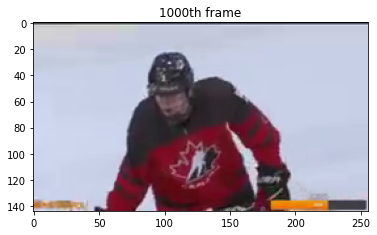

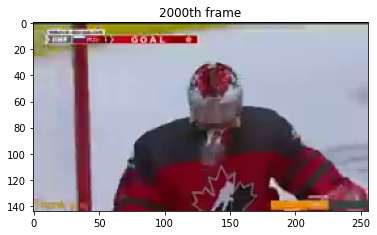

In [6]:
cap = cv2.VideoCapture('C:\\Users\\Jamie\\Downloads\\hockey.mp4')

for i in range(0, 3):
    show_nth_frame(cap, 1000*i, str(1000*i) + "th frame")

#### Optimal Character Recognition (OCR)

Here we attempt to utilize pytesseract's image_to_string capabilities to OCR frames of the video. We utilise the "shapely" library to partition the rectangles into random numbers of columns and rows to see if we can best extract a pattern.

Since randomly selecting number of columns and rows is inefficient (for instance you might OCR the same partition twice!), we shall optimize this process later.

Additionally the image_to_string function does not work over the span of different camera angles, which compromises performance.

We find out very soon that partitioning the view into rectangles and OCRing is not an effective approach.

In [7]:
# Using code from here: stackoverflow.com/questions/58283684
# to partition our rectangle

from shapely.geometry import LineString, MultiPolygon, Polygon
from shapely.ops import split

def partition_rectangle(img_shape, nx, ny):
    rec = [(0, 0), (0, img_shape[0]), (img_shape[1], img_shape[0]), (img_shape[1], 0)]
    
    polygon = Polygon(rec)

    minx, miny, maxx, maxy = polygon.bounds
    dx = (maxx - minx) / nx  # width of a small part
    dy = (maxy - miny) / ny  # height of a small part
    horizontal_splitters = [LineString([(minx, miny + i*dy), (maxx, miny + i*dy)]) for i in range(ny)]
    vertical_splitters = [LineString([(minx + i*dx, miny), (minx + i*dx, maxy)]) for i in range(nx)]
    splitters = horizontal_splitters + vertical_splitters

    result = polygon
    for splitter in splitters:
        result = MultiPolygon(split(result, splitter))

    parts = [list(part.exterior.coords) for part in result.geoms]
    return parts

In [8]:
import cv2
import pytesseract 
from scipy import ndimage

#rotated = ndimage.rotate(image_to_rotate, 45)

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

img = cv2.imread("photoSaved/frame0000.jpg")
img = ndimage.rotate(img, 10)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray = ndimage.rotate(gray, 10)
#thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
#invert = 255 - thresh
#show_image(gray)
#show_image(thresh)
#show_image(invert)

def get_text_from_partition(img, nx, ny):
    parts = partition_rectangle(img.shape, nx, ny)
    filt1 = [""]
    for i in range(len(parts)):
        x_1 = int(parts[i][3][0])
        y_1 = int(parts[i][3][1])

        x_2 = int(parts[i][1][0])
        y_2 = int(parts[i][1][1])


        #show_image(img[min(y_1, y_2):max(y_1, y_2)
        #               , min(x_1, x_2):max(x_1, x_2)])
        
        filt1.append(pytesseract.image_to_string(img[min(y_1, y_2):max(y_1, y_2)
                       , min(x_1, x_2):max(x_1, x_2)]))
    return(filt1)

1 5
['', 'ae. Nc\n', '', '', '', '']
7 5
['', '', '', '—"\n', 'a\n', '', 'NCS\n', '', '', '', '', '', '', '', '', '', 'in\n', '', '', '', '', '', '', '', '', 'CG\n', '', '|\n', '', '', '', '', '', '', '', '']
5 7
['', '', '', '', '', '', '', '', 'vant\n', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
4 7
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
time elapsed: 17s


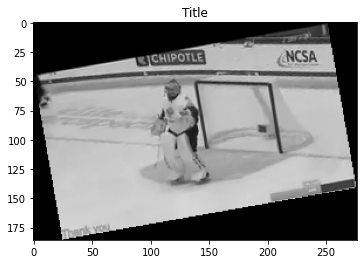

In [10]:
import time
import numpy as np

start = time.time()

for i in range(4):
    ra = np.random.randint(1, 8, size=2)
    print(ra[0], ra[1])
    print(get_text_from_partition(gray, ra[0], ra[1]))

end = time.time()
print("time elapsed: " + str(int(end - start))+ "s")

show_image(gray)

Takes far too long, does not even identify "CHIPOTLE". Likely we cannot make a good model with pytesseract.image_to_string

#### Template Matching

Our goal now is to deduce whether or not a certain brand's logo is in the frame. We utilize cv2.matchTemplate to predict how likely it is that our template (Chipotle logo) is in our image (hockey frame).

Again the initial performance is poor, and parameters such as the TemplateMatchModes and optimal number of rotations (or linear mappings more generally) need to be properly tuned. [This resource](https://stackoverflow.com/questions/58158129/understanding-and-evaluating-template-matching-methods) may serve as a useful reference for the former.

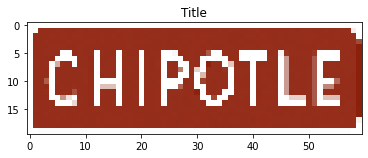

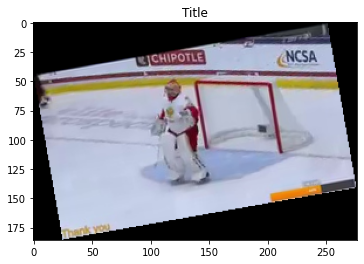

[0.24233939]
0


In [11]:
import scipy

arr = []
for i in range(60,61):
    chipotle_logo = cv2.imread("chipotle_logo.PNG")
    small = cv2.resize(chipotle_logo, dsize=(i, i//3), interpolation=cv2.INTER_CUBIC)
    
    #show_image(small)

    def match_template(image, template):
        return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    match = match_template(small, img)

    #print(max(np.ndarray.flatten(np.array(match))))
    arr.append(max(np.ndarray.flatten(np.array(match))))
    #print(img.shape)

    show_image(small)
    show_image(img)
print(np.array(arr))
print(np.argmax(np.array(arr)))

As we range from our logo having pixel height of 1 to pixel height of 60, we note that our 'match' metric decreases monotonically. This suggests our model might not be accurately capturing the relationship between our template and image.

### PCA/SVM/K-NN on Iris Dataset

#### PCA

We start by taking the graphing all $4 \operatorname{ choose } 2$ combinations of the $4$ columns matched together. Then we take the first two principal components and graph it, and then the first three components and graph it in $\mathbb{R}^3$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

<IPython.core.display.Javascript object>


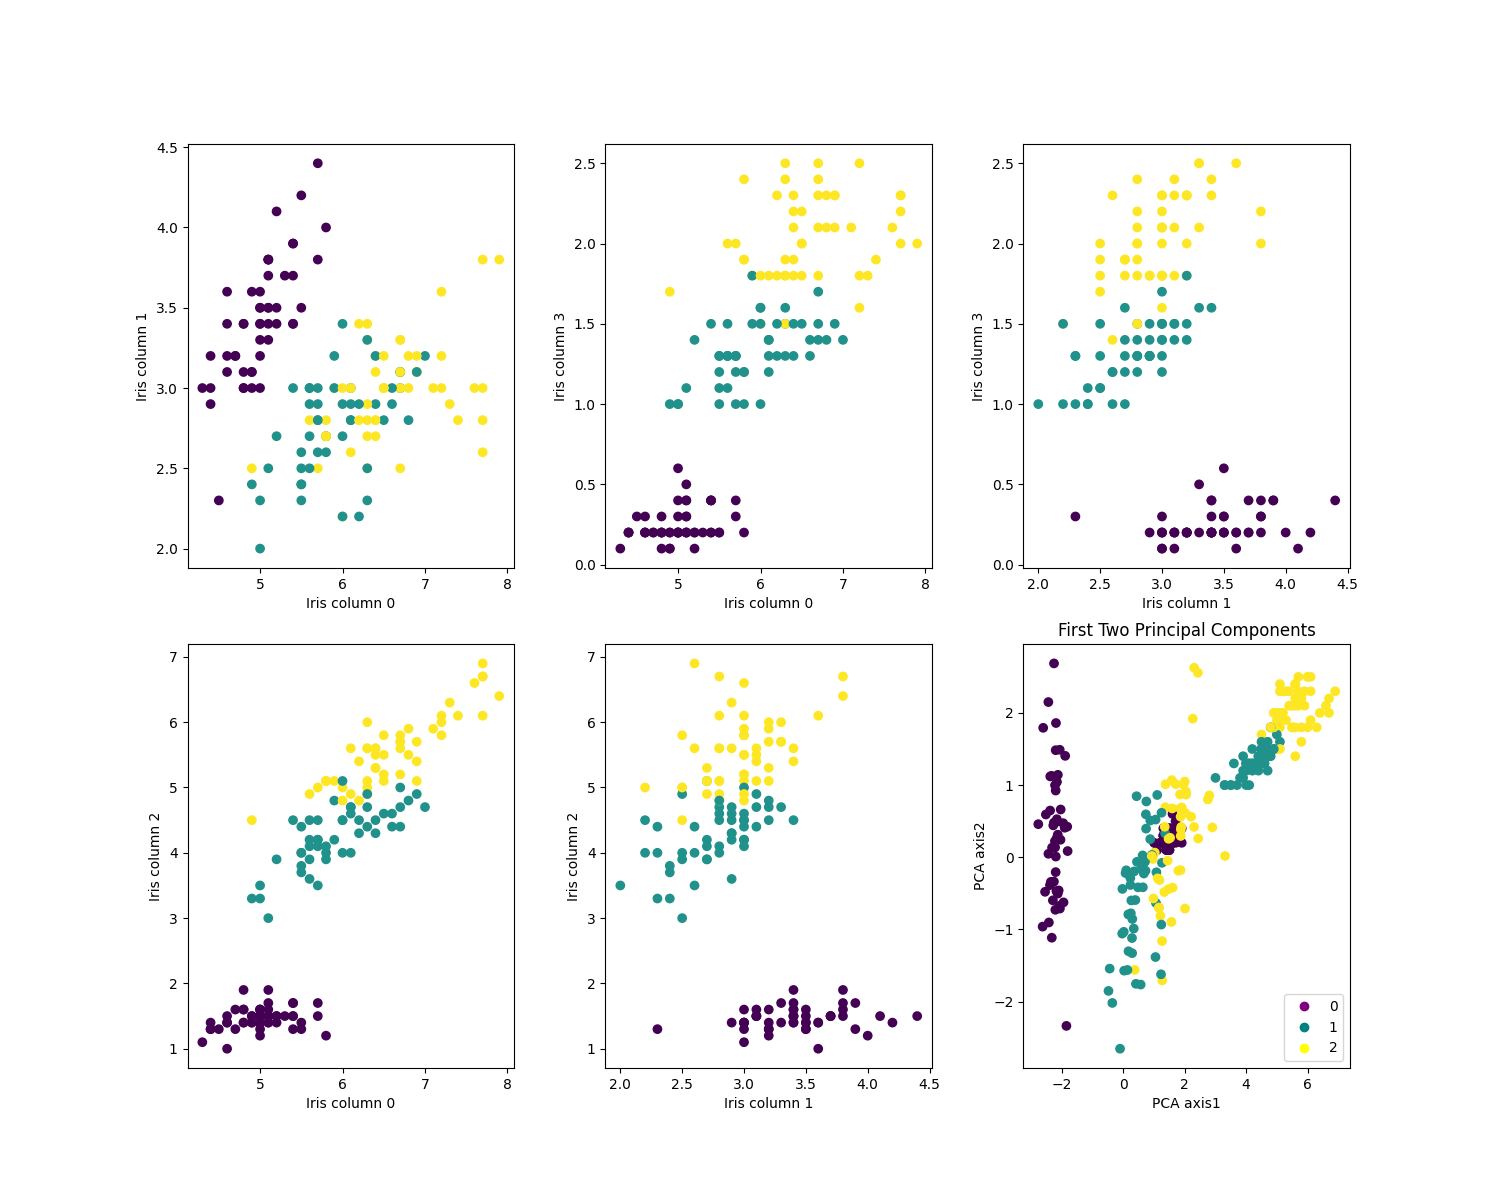

In [3]:
from sklearn.utils import shuffle
import numpy as np

X = np.array(iris['data'])
y = np.array(iris['target'])
X, y = shuffle(X, y)

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, gridspec_kw={'hspace': .18, 'wspace': .28}, figsize=(15, 12))

import itertools
comparisons = np.array(list(itertools.combinations([0, 1, 2, 3], 2)))

for x in range(0,len(comparisons)):
    i = comparisons[x][0]
    j = comparisons[x][1] 
    axs[(x%2, x // 2)].scatter(X.T[i], X.T[j], c=y)
    axs[(x%2, x // 2)].set_xlabel("Iris column " + str(i))
    axs[(x%2, x // 2)].set_ylabel("Iris column " + str(j))

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


sc = StandardScaler()
X_std = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

pca.explained_variance_ratio_

plt.scatter(X_pca[:, 0], X_pca[:,1], c=y)

label_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
colour_dict = {0: 'purple', 1: 'teal', 2: 'yellow'}
markers = [plt.Line2D([0,0],[0,0], color=colour_dict[item], marker='o', linestyle='') for item in np.unique(y)]
plt.legend(markers, np.unique(y), numpoints=1)
plt.title('First Two Principal Components')
plt.xlabel('PCA axis1')
plt.ylabel('PCA axis2')
plt.show()

<IPython.core.display.Javascript object>


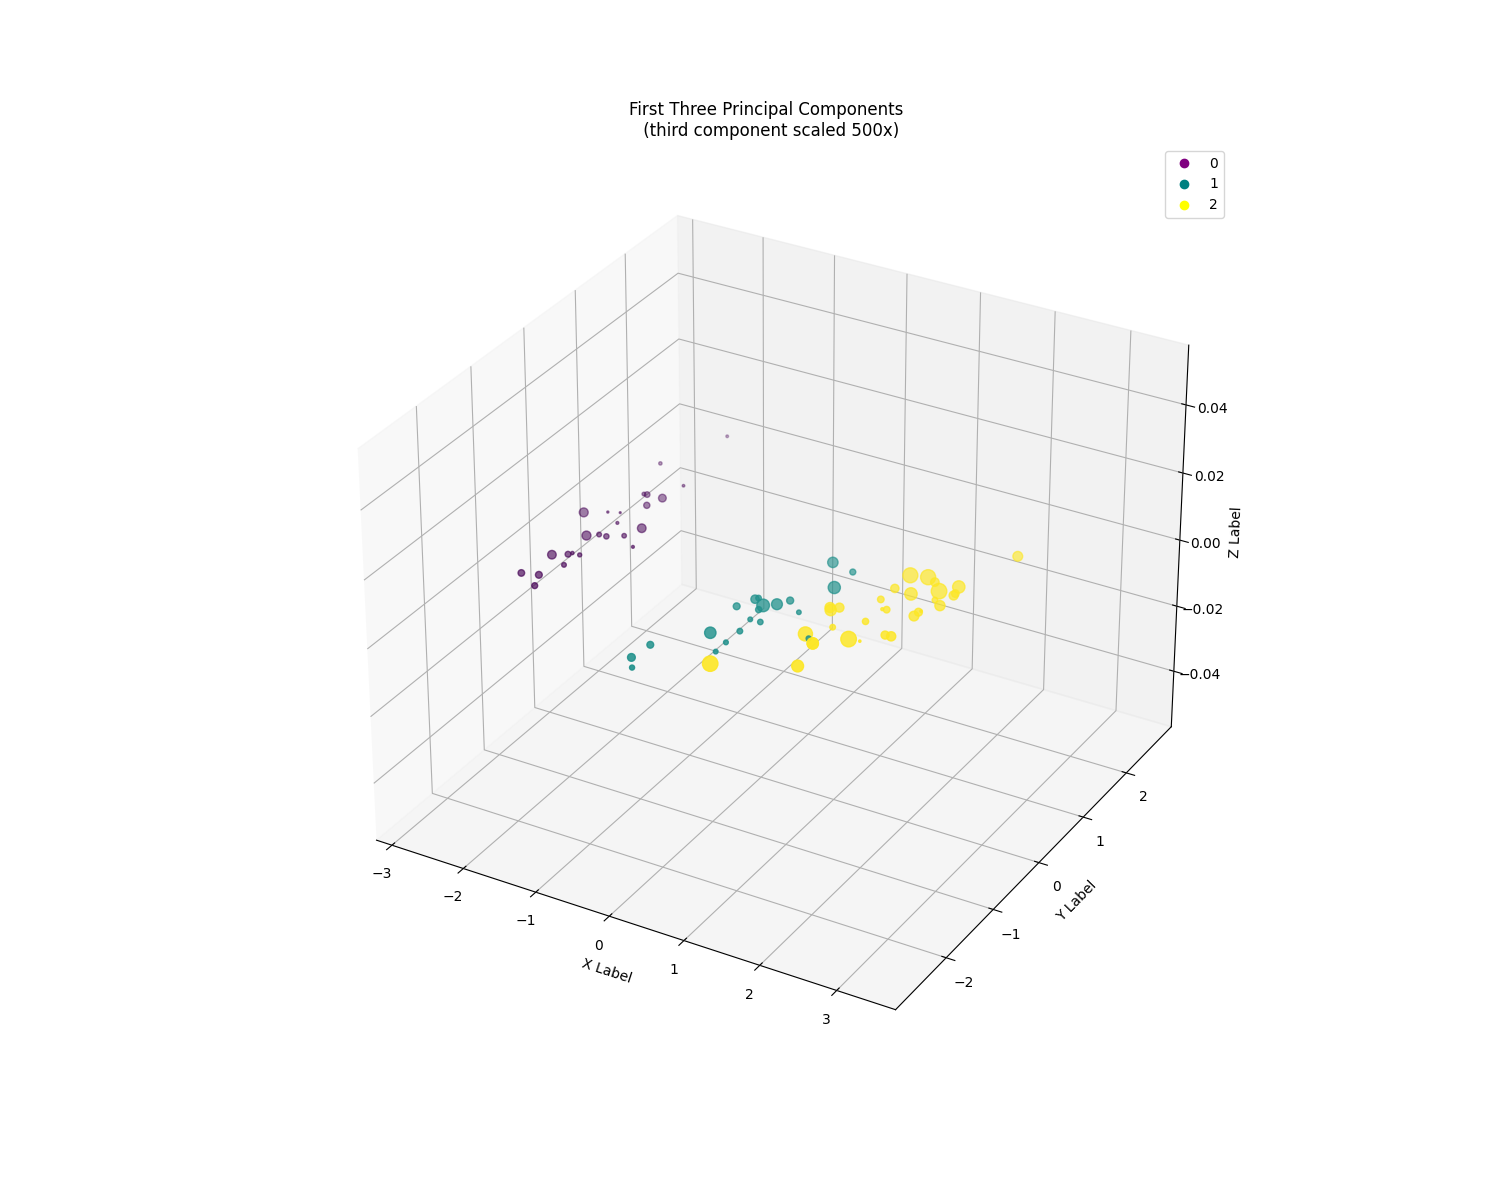

C:\Python39\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
X_std = sc.fit_transform(X)

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_std)

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(projection='3d')

#%matplotlib inline
#%matplotlib notebook

plt.scatter(X_pca3[:, 0], X_pca3[:,1], 500*X_pca3[:,2], marker='.', c=y)

label_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
colour_dict = {0: 'purple', 1: 'teal', 2: 'yellow'}
markers = [plt.Line2D([0,0],[0,0], color=colour_dict[item], marker='o', linestyle='') for item in np.unique(y)]
plt.legend(markers, np.unique(y), numpoints=1)
plt.title('First Three Principal Components \n (third component scaled 500x)')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

#### Support Vector Machine (SVM)
Working on the Iris Dataset, we will utilise a support vector machine to try to classify the type of flower for a given data point. <!--- Again we will write out the SVM by hand in an attempt to recreate the algorithm from the scikit-learn library. -->

In [6]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

#X_pca3 [X_pca3[:, 0], X_pca3[:,1], X_pca3[:,2]]

svc = svclassifier.fit(X_pca3, y)

## Need to test it on real test data!
y_pred = svclassifier.predict(X_pca3[-19:])

print(y_pred)
print(y[-19:]-y_pred)


[0 2 0 0 2 1 2 0 2 0 0 1 1 0 2 0 1 2 2]
[ 0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


<IPython.core.display.Javascript object>


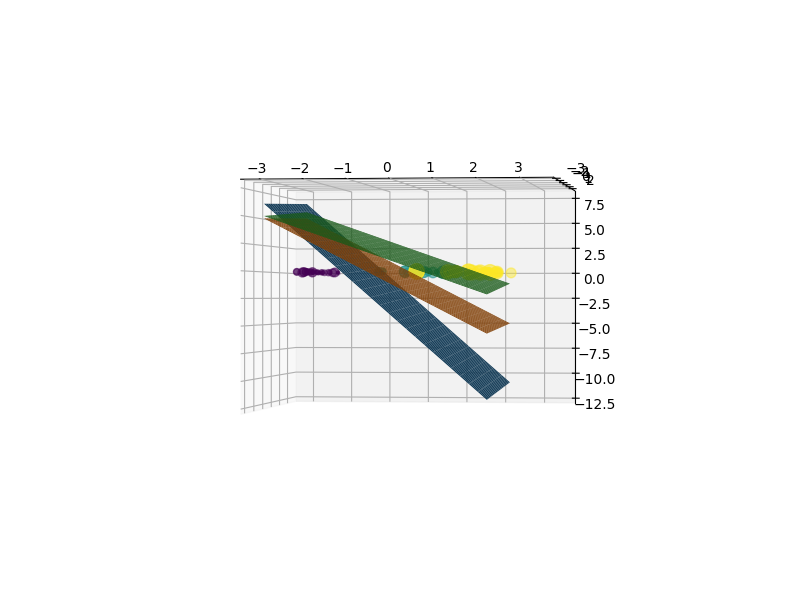

C:\Python39\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [7]:
%matplotlib notebook

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
plt.scatter(X_pca3[:, 0], X_pca3[:,1], 500*X_pca3[:,2], c=y, marker='.')

z_0 = lambda x_1,y_1: (-svc.intercept_[0]-svc.coef_[0][0]*x_1-svc.coef_[0][1]*y_1) / svc.coef_[0][2]
z_1 = lambda x_1,y_1: (-svc.intercept_[1]-svc.coef_[1][0]*x_1-svc.coef_[1][1]*y_1) / svc.coef_[1][2]
z_2 = lambda x_1,y_1: (-svc.intercept_[2]-svc.coef_[2][0]*x_1-svc.coef_[2][1]*y_1) / svc.coef_[2][2]

tmp = np.linspace(-3,2.2,51)
x_1,y_1 = np.meshgrid(tmp,tmp)
ax.plot_surface(x_1, y_1, z_0(x_1,y_1))
ax.plot_surface(x_1, y_1, z_1(x_1,y_1))
ax.plot_surface(x_1, y_1, z_2(x_1,y_1))
plt.show()


In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)


svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

print("y_predicted is: \n" + str(y_pred))
print("\ndiff between pred and label is: \n" + str(y_test-y_pred))

y_predicted is: 
[0 0 1 1 2 1 2 0 2 0 0 2 1 0 1 1 0 2 2 1 1 0 0 2 2 1 2 2 2 2 1 0 1 2 0 2 1
 1 0 2 0 1 2 0 0 2 0 1 1 1 2 2 2 2 1 1 0 0 2 0 1 1 0 1 2 2 1 0 1 0 1 1 0 0
 0]

diff between pred and label is: 
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


#### K-Nearest Neighbors
Our goal in this section is to write the K-NN algorithm by hand such that it matches the results from KNeighborsClassifier algorithm the scikit-learn machine learning library.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()

from sklearn.utils import shuffle
import numpy as np

X = np.array(iris['data'])
y = np.array(iris['target'])
X, y = shuffle(X, y)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)
from scipy import stats
    
def K_nearest(p, K):
    dist_from_p = np.linalg.norm(p*np.ones_like(X_train) - X_train, axis=1)
    nearest_to_p_indices = np.argsort(dist_from_p)[:K]
    mode = stats.mode(y_train[nearest_to_p_indices])[0][0]
    return mode

def annotate_KNN(K, max_iter=float('inf')):
    for i in range(len(X_test)):
        if i >= max_iter:
            return        
        prd = K_nearest(X_test[i], K)
        lab = y_test[i]
        if prd == lab:
            print("\x1B[30mK nearest prediction: " + str(prd) +
                  "\t Actual label " + str(lab))
        else:
            print("\x1b[31mK nearest prediction: " + str(prd) +
                  "\t Actual label " + str(lab))
    return

def accuracy_KNN(K):
    acc = np.zeros_like(y_test)
    for i in range(len(X_test)):
        prd = K_nearest(X_test[i], K)
        lab = y_test[i]
        if prd == lab:
            acc[i] = 1
    return np.sum(acc)/len(acc)

In [25]:
annotate_KNN(30, 20)

K nearest prediction: 2	 Actual label 2
K nearest prediction: 0	 Actual label 0
K nearest prediction: 2	 Actual label 2
K nearest prediction: 2	 Actual label 2
K nearest prediction: 2	 Actual label 2
K nearest prediction: 1	 Actual label 1
K nearest prediction: 2	 Actual label 2
K nearest prediction: 0	 Actual label 0
K nearest prediction: 0	 Actual label 0
K nearest prediction: 1	 Actual label 2
K nearest prediction: 1	 Actual label 1
K nearest prediction: 0	 Actual label 0
K nearest prediction: 0	 Actual label 0
K nearest prediction: 0	 Actual label 0
K nearest prediction: 1	 Actual label 1
K nearest prediction: 0	 Actual label 0
K nearest prediction: 0	 Actual label 0
K nearest prediction: 1	 Actual label 2
K nearest prediction: 2	 Actual label 2
K nearest prediction: 0	 Actual label 0


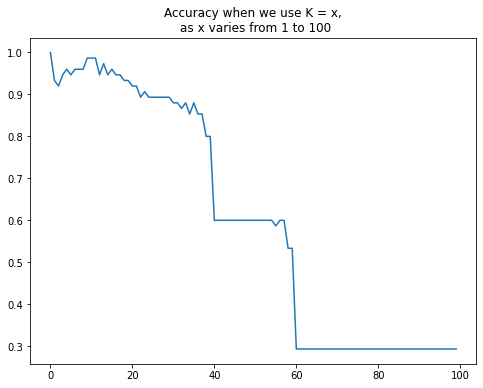

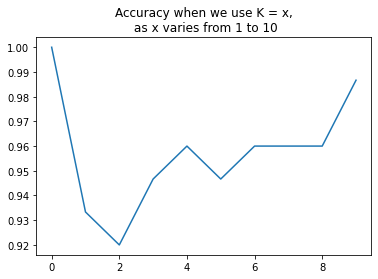

In [27]:
acc_arr = np.ones(100)
for i in range(1, len(acc_arr)):
    acc_arr[i] = accuracy_KNN(i)

%matplotlib inline
fig = plt.figure(figsize=(8, 6))

plt.title("Accuracy when we use K = x,\n as x varies from 1 to 100")
plt.plot(np.arange(100), acc_arr)
plt.show()

acc_arr = np.ones(10)
for i in range(1, len(acc_arr)):
    acc_arr[i] = accuracy_KNN(i)

plt.title("Accuracy when we use K = x,\n as x varies from 1 to 10")
plt.plot(np.arange(10), acc_arr)
plt.show()

### Naive Bayes Classifier

#### Naive Bayes with KDE

We are using the Naive Bayes classifier with kernel density estimation to build a model to predict the class of wine ('class_0', 'class_1', 'class_2') in the sklearn wine dataset. An assumption of the KDE is that the data can be modeled as the (integral weighted) sum of multiple normal distributions, which seems like an appropriate assumption for the wine dataset - as you can see in our histograms below.

Our steps to identify what class a datapoint $p$ belongs to is as follows:

1) Estimate the probability density function (PDF) for each of the 13 features and 3 classes using a kernel density estimate.

2) Define the *prediction array* as $[1, 1, 1]$

3) Iterate on each of the 13 features and 3 classes in the prediction array

4) Multiplying the PDF for the given feature and class by the prediction array at the class' index

        This multiplies each index of the prediction array 13 separate times (one for each feature)

5) Rescale the prediction array so the sum is 1

6) Return the argmax of the prediction array as our prediction for the class



Below is the code:

In [1]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils import shuffle

In [2]:
data = load_wine()
data.target[[10, 80, 140]]

list(data.target_names)

['class_0', 'class_1', 'class_2']

In [3]:
X_data = np.array(data['data'])
y_data = np.array(data['target'])

X_data, y_data = shuffle(X_data, y_data, random_state=0)

X_test = X_data[-20:]
y_test = y_data[-20:]
X = X_data[:-20]
y = y_data[:-20]


X_0 = X[[i for i in range(len(y)) if y[i] == 0]]
X_1 = X[[i for i in range(len(y)) if y[i] == 1]]
X_2 = X[[i for i in range(len(y)) if y[i] == 2]]

print(len(X_1))
print(X.shape)
print(y.shape)

62
(158, 13)
(158,)


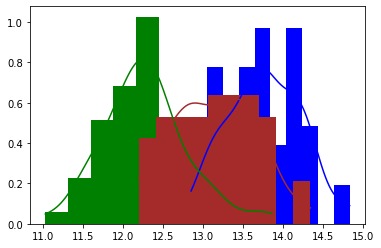

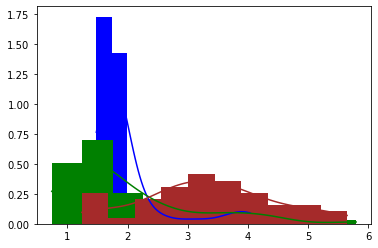

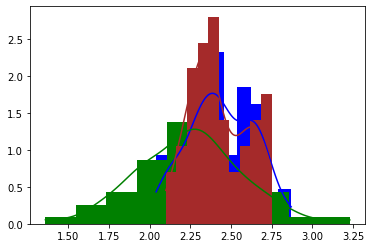

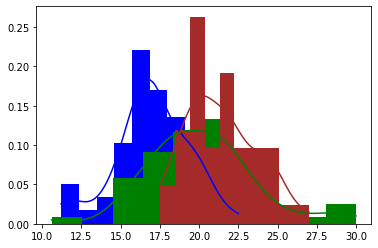

In [4]:
color_dict = {0: 'blue', 1: 'green', 2: 'brown'}
for i in range(4): #range(len(X.T)):
    for j, X_j in enumerate([X_0,X_1,X_2]):
        linspc = np.linspace(min(X_j.T[i]),max(X_j.T[i]), num=100)
        kernel = stats.gaussian_kde(X_j.T[i], bw_method=0.4)
        tmp = plt.plot(linspc,kernel(linspc),color=color_dict[j])
        tmp = plt.hist(X_j.T[i], density=True,color=color_dict[j])
    tmp = plt.show()

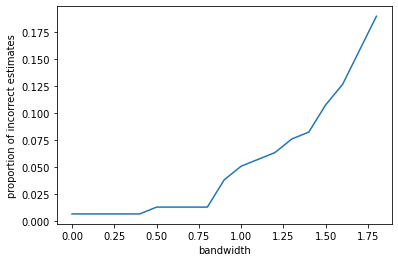

In [5]:
def predict_NB_kernel(p, bw=0.5):
    nb_pred = np.ones(3)
    for i in range(len(X.T)):
        for j, X_j in enumerate([X_0,X_1,X_2]):
            kernel = stats.gaussian_kde(X_j.T[i], bw_method=bw)
            #print(kernel(p[i]))
            nb_pred[j] = nb_pred[j] * kernel(p[i])
    return np.argmax(nb_pred /np.sum(nb_pred))
    
def pred_arr_by_bw(bw):
    pred_arr = np.zeros(len(X))
    for i in range(len(X)):
        pred_arr[i] = predict_NB_kernel(X[i], bw)
    return np.mean(np.sign(np.abs(pred_arr-y)))

scores_by_bw = np.ones(20)
for i in range(1, 20):
    scores_by_bw[i] = pred_arr_by_bw(.1*i)

plt.plot(np.arange(19)*.1, scores_by_bw[1:])
plt.xlabel("bandwidth")
plt.ylabel("proportion of incorrect estimates")
plt.show()

Our bandwith is optimal if it neither overfits nor underfits our data. Utilising the elbow method, we derive that our optimal bandwidth is around 0.25 to 0.75, so we use 0.4.

In [6]:
def evaluate_model(X_test, y_test):
    pred_arr = np.zeros(len(X_test))
    for i in range(len(X_test)):
        pred_arr[i] = predict_NB_kernel(X_test[i], .4)
        if pred_arr[i] != y_test[i]:
            print("element", i, "\t", pred_arr[i], y_test[i])
    return np.mean(np.sign(np.abs(pred_arr-y_test)))

print("\nOur model mislabels ", 100*evaluate_model(X_test, y_test), " percent of our test set")

element 2 	 1.0 0
element 10 	 2.0 1

Our model mislabels  10.0  percent of our test set


#### Gaussian Naive Bayes

We can now compare the performance to sklearn's GaussianNB function as follows

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred = gnb.fit(X, y).predict(X_test)

gnb_inaccuracy = 100*np.mean(np.sign(np.abs(y_pred-y_test)))

print("\nOur model mislabels %d percent of our test set" % gnb_inaccuracy)


Our model mislabels 10 percent of our test set


The performance for our Naive Bayes classifier with Kernel Density Estimation is the same as that of sklearn's GaussianNB function, which just uses a Gaussian distribution to model the features of each class.

### Decision Trees & Sklearn Pipelines

In [1]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'),
              'C':range(1, 2)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)


print(sorted(clf.cv_results_.keys()))

print(clf.cv_results_["mean_test_score"])

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
[0.98       0.96666667]


In [41]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

df = pd.read_csv(r"test_set.csv")

df = df.drop(['x6', 'x9'], axis=1)
arr = np.array(df)


y = arr[:,-1:].flatten()
X = arr[:, :-1]

def power_trans(data):
    if len(np.unique(data)) < 5:
        return data    
    data = data.reshape((len(data),1))
    power = PowerTransformer(method='box-cox', standardize=True)
    data_trans = power.fit_transform(data)
    return data_trans.T[0]

def shift_and_pow_tr():
    for i in range(len(X.T)):
        X.T[i] = X.T[i] - np.min(X.T[i]) + 5
        X.T[i] = power_trans(X.T[i])
    return

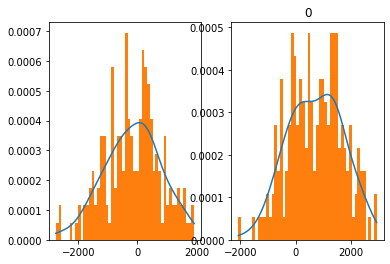

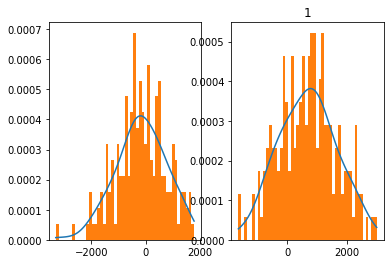

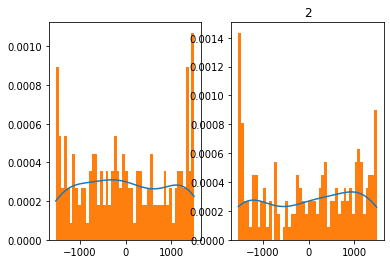

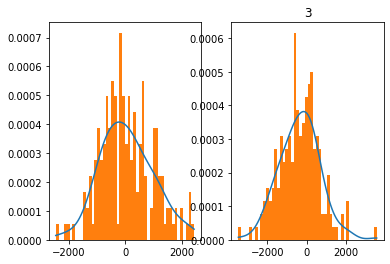

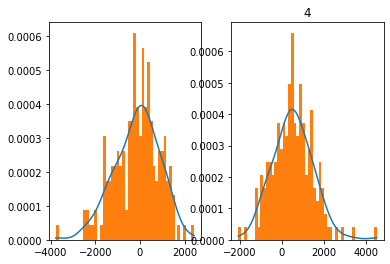

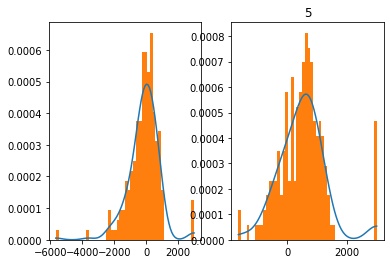

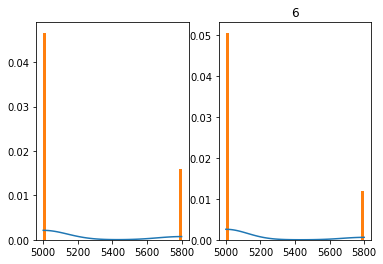

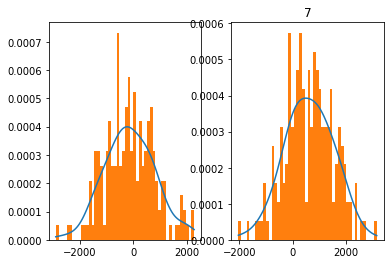

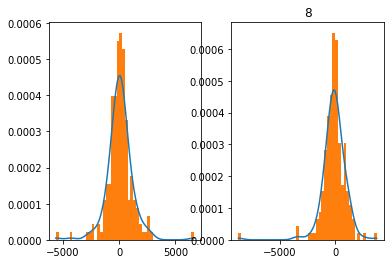

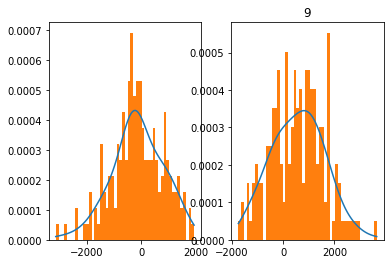

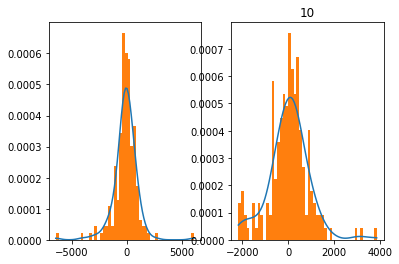

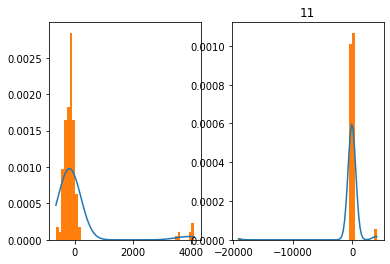

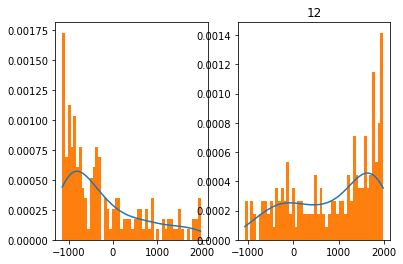

In [24]:
from scipy import stats

def plot_side_by_side(X, max_n=200):
    X_0 = X[y == 0][:max_n]
    X_1 = X[y == 1][:max_n]
    for i in range(len(X.T)):
        fig, axs = plt.subplots(1, 2)
        tmp = plt.title(i)
        kernel_0 = stats.gaussian_kde(X_0.T[i], bw_method=0.4)
        linspc = np.linspace(min(X_0.T[i]),max(X_0.T[i]), num=100)
        tmp = axs[0].plot(linspc,kernel_0(linspc))
        tmp = axs[0].hist(X_0.T[i], bins=50, density=True)
        kernel_1 = stats.gaussian_kde(X_1.T[i], bw_method=0.4)
        linspc = np.linspace(min(X_1.T[i]),max(X_1.T[i]), num=100)
        tmp = axs[1].plot(linspc,kernel_1(linspc))
        tmp = axs[1].hist(X_1.T[i], bins=50, density=True)
        tmp = plt.show()
    return

plot_side_by_side(X, max_n = 185)

In [6]:
from scipy import stats

# Naive Bayes. Hybrid continuous and
# discrete
def NB_discrete_cutoff(X, k, p):
    pred_arr = np.ones(2)
    X_0 = X[y == 0][:185]
    X_1 = X[y == 1]
    for i in [3, 5, 6, 8, 9,  11]:
        kernel_0 = stats.gaussian_kde(X_0.T[i], bw_method=0.4)
        kernel_1 = stats.gaussian_kde(X_1.T[i], bw_method=0.4)
        if len(X.T[i][X.T[i] == p[i]]) > k:
            pred_arr[0] = pred_arr[0]*max(len(X_0.T[i][X_0.T[i] == p[i]])/len(X.T[i][X.T[i] == p[i]]), 0.0001)
            pred_arr[1] = pred_arr[1]*max(len(X_1.T[i][X_1.T[i] == p[i]])/len(X.T[i][X.T[i] == p[i]]), 0.0001)
        else:
            pred_arr[0] = pred_arr[0]*max(kernel_0(p[i]), 0.0001)
            pred_arr[1] = pred_arr[1]*max(kernel_1(p[i]), 0.0001)
    for i in [(2, 12), (1, 10), (4, 7)]:
        kernel_0 = stats.gaussian_kde(np.vstack([X_0.T[i[0]], X_0.T[i[1]]]))
        kernel_1 = stats.gaussian_kde(np.vstack([X_1.T[i[0]], X_1.T[i[1]]]))
        pred_arr[0] = pred_arr[0]*max(kernel_0.pdf((p[i[0]], p[i[1]])), 0.000001)
        pred_arr[1] = pred_arr[1]*max(kernel_1.pdf((p[i[0]], p[i[1]])), 0.000001)
    return pred_arr/np.sum(pred_arr)

y_pred = np.ones_like(y)
for i in range(1000):
    y_pred[i] = np.argmax(NB_discrete_cutoff(X, 10, X[i]))
    if y_pred[i] != y[i]:
        #print(NB_discrete_cutoff(X, 10, X[i]))
        pass
print(np.mean(np.abs(y_pred-y)))

0.26


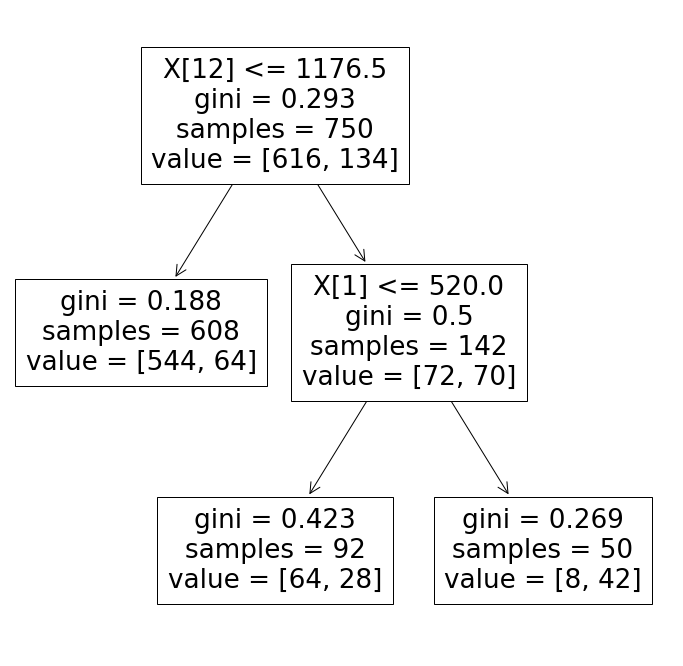

In [8]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf)

plt.show()

In [9]:
np.mean(np.abs(clf.predict(X_test)-y_test))

0.172

[1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


0.808

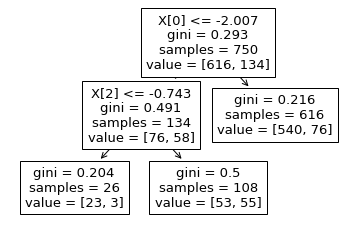

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

def times_random():
    for i in range(len(X_train)):
        X_train[i] = X_train[i]*0
    return

pca = PCA(n_components=3)

def fit_hyperparams():
    parameters = {'max_leaf_nodes':range(3, 15, 2),
              'min_samples_split': (3, 10),
              'max_depth':range(2, 7)}
    clf_grid = GridSearchCV(clf, parameters, cv=5)
    clf_grid.fit(X_train, y_train)
    clf.set_params(**clf_grid.best_params_).fit(X_train, y_train)
    return


df = pd.read_csv(r"test_set.csv")

def process_X():
    df2 = df.drop(['x6', 'x9'], axis=1)
    arr = np.array(df2)
    y = arr[:,-1:].flatten()
    X = arr[:, :-1]
    shift_and_pow_tr()
    
pipe_X = Pipeline([('prX', process_X)])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier()

pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', pca),
                 ('Power', shift_and_pow_tr()),
                 ('fit_hyper', fit_hyperparams()),
                 ('clf', clf)])

pipe.fit(X_train, y_train)

print(pipe.predict(X_test))
tree.plot_tree(clf)

pipe.score(X_test, y_test)

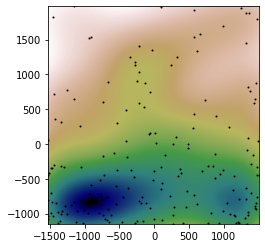

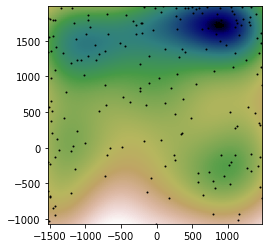

In [11]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

from scipy import stats

def plot_kde(X):
    m1 = X.T[2]
    m2 = X.T[12]

    xmin = m1.min()
    xmax = m1.max()
    ymin = m2.min()
    ymax = m2.max()
    #Perform a kernel density estimate on the data:

    X_tmp, Y_tmp = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X_tmp.ravel(), Y_tmp.ravel()])
    values = np.vstack([m1, m2])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X_tmp.shape)
    #Plot the results:

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
              extent=[xmin, xmax, ymin, ymax])
    ax.plot(m1, m2, 'k.', markersize=2)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    plt.show()
    return

plot_kde(X_0)
plot_kde(X_1)
